In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
!pip install jovian --upgrade -q


In [13]:
!pip install sweetviz

In [14]:
import csv
import folium
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches

# sklearn: 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objs as go
import plotly as plt
import seaborn as sns
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")


# folium: 
from folium import plugins
from folium.plugins import HeatMap



import colorlover as cl
from IPython.display import HTML
from IPython.display import display
import pandas as pd

# Pretty display for notebooks
%matplotlib inline
import jovian

In [15]:
accidents= pd.read_csv('gdrive/MyDrive/Road Safety Data Accident 2019.csv', low_memory=False,dtype={'Accident_index':'int','LSOA_of_Accident_Location':'str'})

In [16]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

In [17]:
vehicles= pd.read_csv('gdrive/MyDrive/Road Safety Data Vehicles 2019.csv')

In [18]:
vehicles.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,-1,-1,-1,4,1,4


In [19]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216381 entries, 0 to 216380
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    216381 non-null  object
 1   Vehicle_Reference                 216381 non-null  int64 
 2   Vehicle_Type                      216381 non-null  int64 
 3   Towing_and_Articulation           216381 non-null  int64 
 4   Vehicle_Manoeuvre                 216381 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  216381 non-null  int64 
 6   Junction_Location                 216381 non-null  int64 
 7   Skidding_and_Overturning          216381 non-null  int64 
 8   Hit_Object_in_Carriageway         216381 non-null  int64 
 9   Vehicle_Leaving_Carriageway       216381 non-null  int64 
 10  Hit_Object_off_Carriageway        216381 non-null  int64 
 11  1st_Point_of_Impact               216381 non-null  int64 
 12  Wa

In [20]:
casualties= pd.read_csv('gdrive/MyDrive/Road Safety Data Casualties 2019.csv')

In [21]:
accidents.replace(-1, 'NaN', inplace=True)
casualties.replace(-1, 'NaN', inplace=True)
vehicles.replace(-1, 'NaN', inplace=True)


In [22]:
AccCas_df = pd.merge(accidents, casualties, on='Accident_Index')


In [23]:
casualties.drop_duplicates(subset ="Accident_Index", keep = False, inplace = True)

In [24]:
vehicles.drop_duplicates(subset ="Accident_Index", keep = False, inplace = True)

In [25]:
accidents.drop_duplicates(subset ="Accident_Index", keep = False, inplace = True)

In [26]:
combined_df = pd.merge(AccCas_df, vehicles, on='Accident_Index')

In [27]:
columns_useful = ['Accident_Index', 'Accident_Severity', 'Date', 'Day_of_Week', 'Vehicle_Type', 'Light_Conditions', 
                    'Number_of_Casualties', 'Time', 'Weather_Conditions','Age_Band_of_Driver', 'Vehicle_Manoeuvre', 
                    'Age_of_Vehicle','Sex_of_Driver','Engine_Capacity_(CC)','Propulsion_Code', 'Journey_Purpose_of_Driver',
                  'Location_Easting_OSGR','Casualty_Type','Location_Northing_OSGR','Road_Type','Speed_limit','Road_Surface_Conditions',
                  'Urban_or_Rural_Area','Pedestrian_Movement', 'Pedestrian_Location', 'Was_Vehicle_Left_Hand_Drive?','Age_of_Vehicle']

In [28]:
# Create a copy of the data frame and extract the relevant columns
data = combined_df[columns_useful].copy()
                        


In [29]:
data

,Accident_Index,Accident_Severity,Date,Day_of_Week,Vehicle_Type,Light_Conditions,Number_of_Casualties,Time,Weather_Conditions,Age_Band_of_Driver,...,Casualty_Type,Location_Northing_OSGR,Road_Type,Speed_limit,Road_Surface_Conditions,Urban_or_Rural_Area,Pedestrian_Movement,Pedestrian_Location,Was_Vehicle_Left_Hand_Drive?,Age_of_Vehicle
0,2019040853504,2,11/06/2019,3,9,1,2,15:21,1,10,...,9,428972.0,9,30,1,1,0,0,1,13
1,2019040853512,3,12/06/2019,4,9,1,1,17:40,2,7,...,0,427890.0,6,20,2,1,4,5,1,12
2,2019040853513,3,13/06/2019,5,9,1,1,08:30,2,NaN,...,0,443690.0,6,30,2,2,7,9,1,NaN
3,2019040853514,2,13/06/2019,5,9,1,1,08:17,2,7,...,0,430770.0,6,30,2,1,2,5,1,10
4,2019040853516,2,13/06/2019,5,9,1,1,13:30,2,8,...,0,426530.0,3,50,2,2,3,5,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20570,2019984106519,3,04/05/2019,7,9,1,1,08:43,1,8,...,9,582916.0,3,70,1,2,0,0,1,4
20571,2019984106719,2,21/05/2019,3,19,1,1,19:15,1,10,...,19,574940.0,6,60,1,2,0,0,1,17
20572,2019984106919,3,18/05/2019,7,19,1,1,01:00,1,5,...,19,573392.0,6,60,2,2,0,0,1,14
20573,2019984107419,3,29/06/2019,7,9,1,1,14:10,1,11,...,0,584226.0,6,30,1,2,3,5,1,6


In [30]:

data.isnull().values.any()

True

In [31]:
data.isna().sum()

Accident_Index                  0
Accident_Severity               0
Date                            0
Day_of_Week                     0
Vehicle_Type                    0
Light_Conditions                0
Number_of_Casualties            0
Time                            7
Weather_Conditions              0
Age_Band_of_Driver              0
Vehicle_Manoeuvre               0
Age_of_Vehicle                  0
Sex_of_Driver                   0
Engine_Capacity_(CC)            0
Propulsion_Code                 0
Journey_Purpose_of_Driver       0
Location_Easting_OSGR           5
Casualty_Type                   0
Location_Northing_OSGR          5
Road_Type                       0
Speed_limit                     0
Road_Surface_Conditions         0
Urban_or_Rural_Area             0
Pedestrian_Movement             0
Pedestrian_Location             0
Was_Vehicle_Left_Hand_Drive?    0
Age_of_Vehicle                  0
dtype: int64

In [32]:
#casualties.drop_duplicates(subset ="Accident_Index", keep = False, inplace = True)

In [33]:
data.isna().sum()

Accident_Index                  0
Accident_Severity               0
Date                            0
Day_of_Week                     0
Vehicle_Type                    0
Light_Conditions                0
Number_of_Casualties            0
Time                            7
Weather_Conditions              0
Age_Band_of_Driver              0
Vehicle_Manoeuvre               0
Age_of_Vehicle                  0
Sex_of_Driver                   0
Engine_Capacity_(CC)            0
Propulsion_Code                 0
Journey_Purpose_of_Driver       0
Location_Easting_OSGR           5
Casualty_Type                   0
Location_Northing_OSGR          5
Road_Type                       0
Speed_limit                     0
Road_Surface_Conditions         0
Urban_or_Rural_Area             0
Pedestrian_Movement             0
Pedestrian_Location             0
Was_Vehicle_Left_Hand_Drive?    0
Age_of_Vehicle                  0
dtype: int64

In [34]:
data= data.dropna()


In [35]:
data['Date'] = pd.to_datetime((data['Date']), format= "%d/%m/%Y")

In [36]:
# time series features: 
data['Year'] = data.Date.dt.year 
data['Month_number'] = data.Date.dt.month
data['Month'] = data.Date.dt.month_name()
data['Hour'] = data.apply(lambda x: str(x.Time).split(':')[0], axis=1)

In [37]:
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"

In [38]:
# slice first and second string from time column
data['Hour'] = data['Time'].str[0:2]

# convert new column to numeric datetype
data['Hour'] = pd.to_numeric(data['Hour'])

# drop null values in our new column
data = data.dropna(subset=['Hour'])

# cast to integer values
data['Hour'] = data['Hour'].astype('int')

In [39]:
# temporary hour function
data['Daytime'] = data['Hour'].apply(when_was_it)
data[['Time', 'Hour', 'Daytime']].head(20)

,Time,Hour,Daytime
0,15:21,15,afternoon rush (15-19)
1,17:40,17,afternoon rush (15-19)
2,08:30,8,morning rush (5-10)
3,08:17,8,morning rush (5-10)
4,13:30,13,office hours (10-15)
5,19:22,19,evening (19-23)
6,09:02,9,morning rush (5-10)
7,17:31,17,afternoon rush (15-19)
8,18:30,18,afternoon rush (15-19)
9,11:25,11,office hours (10-15)


In [40]:
accidents['Date'] = pd.to_datetime((accidents['Date']), format= "%d/%m/%Y")

In [41]:
# time series features: 
accidents['Year'] = accidents.Date.dt.year 
accidents['Month_number'] = accidents.Date.dt.month
accidents['Month'] = accidents.Date.dt.month_name()
accidents['Hour'] = accidents.apply(lambda x: str(x.Time).split(':')[0], axis=1)

In [42]:
# slice first and second string from time column
accidents['Hour'] = accidents['Time'].str[0:2]

# convert new column to numeric datetype
accidents['Hour'] = pd.to_numeric(accidents['Hour'])

# drop null values in our new column
accidents = accidents.dropna(subset=['Hour'])

# cast to integer values
accidents['Hour'] = accidents['Hour'].astype('int')

In [43]:
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"

In [44]:
# apply thus function to our temporary hour column
accidents['Daytime'] = accidents['Hour'].apply(when_was_it)
accidents[['Time', 'Hour', 'Daytime']].head(20)

,Time,Hour,Daytime
0,17:50,17,afternoon rush (15-19)
1,21:45,21,evening (19-23)
2,01:50,1,night (23-5)
3,01:20,1,night (23-5)
4,00:40,0,night (23-5)
5,02:45,2,night (23-5)
6,01:35,1,night (23-5)
7,02:10,2,night (23-5)
8,01:15,1,night (23-5)
9,04:30,4,night (23-5)


In [45]:
test = pd.DataFrame(accidents.set_index('Date').resample('M').size())
test.columns = ['Accidents']

In [46]:
test['rolling'] = test['Accidents'].rolling(window=5).mean()
test.tail()

,Accidents,rolling
Date,,
2019-08-31,9531,9687.4
2019-09-30,10213,9950.6
2019-10-31,10307,10061.4
2019-11-30,10931,10260.2
2019-12-31,9967,10189.8


In [47]:
#New_df['Date'] = pd.to_datetime((New_df['Date']), format= "%d/%m/%Y")

In [48]:
# calculate the portion of accidents result in casualties

# using the each count in the column Accident_Severity to be an accident that occurred 

casualty_rate = accidents.Number_of_Casualties.sum() / data.Accident_Severity.count()
casualty_rate

7.444293147886982

In [49]:
# total is viewed as the sum of all the accidents that occured monthly 

total_accidents = accidents.Month.count()
total_accidents

117473

In [50]:
# calculate how many accidents for the years represented in the dataframe
accidents_by_year = accidents.Year.value_counts().sort_values(ascending = False)
accidents_by_year

2019    117473
Name: Year, dtype: int64

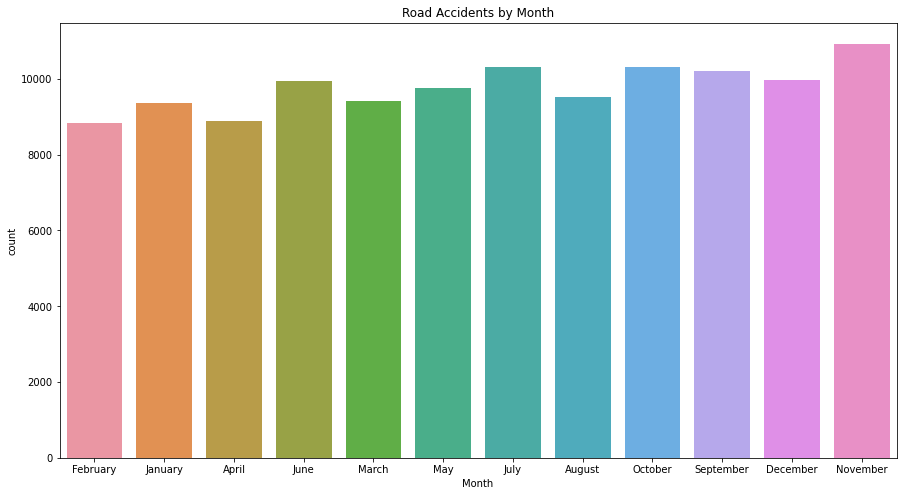

In [51]:
# calculate how many accidents for the month represented in the dataframe

# The months of the year with January = 1, December = 12.

plt.figure(figsize=(15,8))

sns.countplot(x='Month',data=accidents)

plt.title("Road Accidents by Month");

In [52]:

weekday_counts = pd.DataFrame(accidents.set_index('Date').resample('1d')['Accident_Index'].size().reset_index())
weekday_counts.columns = ['Date', 'Count']
#weekday_counts

weekday = weekday_counts['Date'].dt.day_name()
#weekday

weekday_averages = pd.DataFrame(weekday_counts.groupby(weekday)['Count'].mean().reset_index())
weekday_averages.columns = ['Weekday', 'Average_Accidents']
weekday_averages.set_index('Weekday', inplace=True)
weekday_averages

,Average_Accidents
Weekday,
Friday,366.134615
Monday,319.923077
Saturday,299.038462
Sunday,248.557692
Thursday,345.461538
Tuesday,331.943396
Wednesday,341.653846


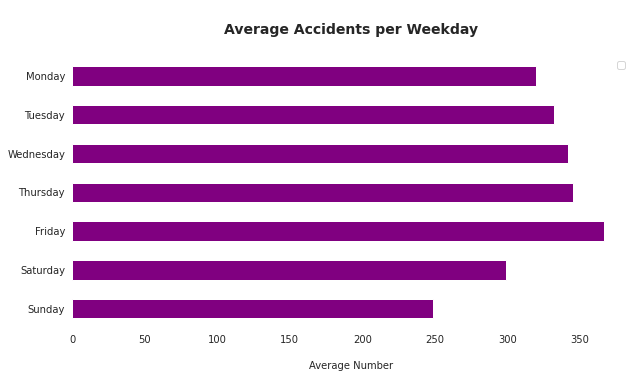

In [53]:
# reorder the weekdays beginning with Monday (backwards because of printing behavior!)
days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))
colors=['purple']

# plot
weekday_averages.reindex(days).plot(kind='barh', ax=ax, color=colors)
ax.set_title('\nAverage Accidents per Weekday\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nAverage Number', ylabel='')
ax.legend('')

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

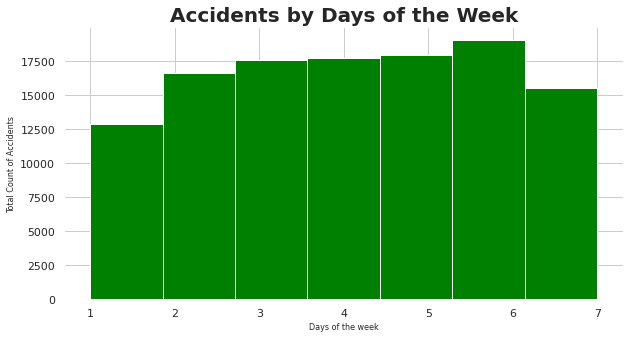

In [129]:
# prepare plot
#Sunday ==1
#Monday ==2
#Tuesday ==3
#Wednesay ==4
#Thursday ==5
#Friday ==6
#Saturday ==7
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))
colors= ['green']
# plot
accidents.Day_of_Week.hist(bins=7, ax=ax, color= colors)

ax.set_title('Accidents by Days of the Week', fontsize=20, fontweight='bold')
ax.set(xlabel='Days of the week', ylabel='Total Count of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

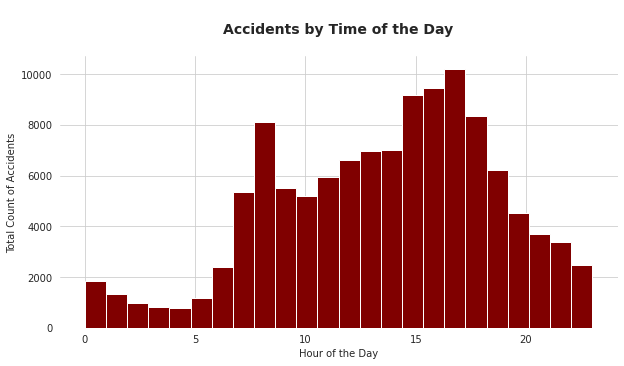

In [55]:
#How accidents are distributed throughout the day
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))


# plot
accidents.Hour.hist(bins=24, ax=ax, color='maroon')

ax.set_title('\nAccidents by Time of the Day\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Total Count of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

In [56]:
weekday = accidents['Date'].dt.day_name()
year    = accidents['Date'].dt.year

accident_table = accidents.groupby([year, weekday]).size()
accident_table = accident_table.rename_axis(['Year', 'Weekday'])\
                               .unstack('Weekday')\
                               .reindex(columns=days)
accident_table
accident_table

Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday
Year,,,,,,,
2019,12925,15550,19039,17964,17766,17593,16636


In [57]:
weekday = accidents['Date'].dt.day_name()
month   = accidents['Date'].dt.month

accident_table = accidents.groupby([month, weekday]).size()
accident_table= accident_table.rename_axis(['Month', 'Weekday'])\
                               .unstack('Weekday')\
                               .reindex(columns=days)
accident_table
accident_table

Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday
Month,,,,,,,
1,775,970,1275,1602,1723,1712,1310
2,1020,1163,1393,1370,1315,1281,1286
3,1196,1410,1751,1259,1258,1294,1255
4,961,1175,1283,1293,1294,1512,1379
5,978,1175,1704,1739,1699,1376,1082
6,1338,1642,1574,1454,1309,1311,1309
7,1082,1251,1521,1451,1746,1640,1628
8,1045,1460,1769,1611,1230,1239,1177
9,1380,1339,1591,1474,1353,1411,1665


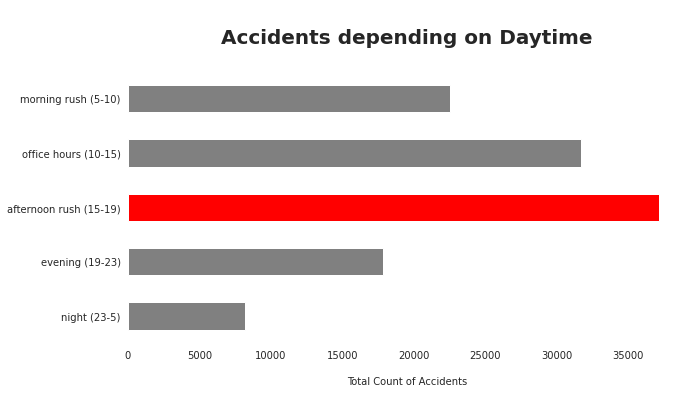

In [58]:
# prepare dataframe
order = ['night (23-5)', 'evening (19-23)', 'afternoon rush (15-19)', 'office hours (10-15)', 'morning rush (5-10)']
df_sub = accidents.groupby('Daytime').size().reindex(order)

# prepare barplot
fig, ax = plt.subplots(figsize=(10,5))
colors = ['grey', 'grey', 'red', 'grey', 'grey']

# plot
df_sub.plot(kind='barh', ax=ax, color=colors)
ax.set_title('\nAccidents depending on Daytime\n', fontsize=20, fontweight='bold')
ax.set(xlabel='\nTotal Count of Accidents', ylabel='')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

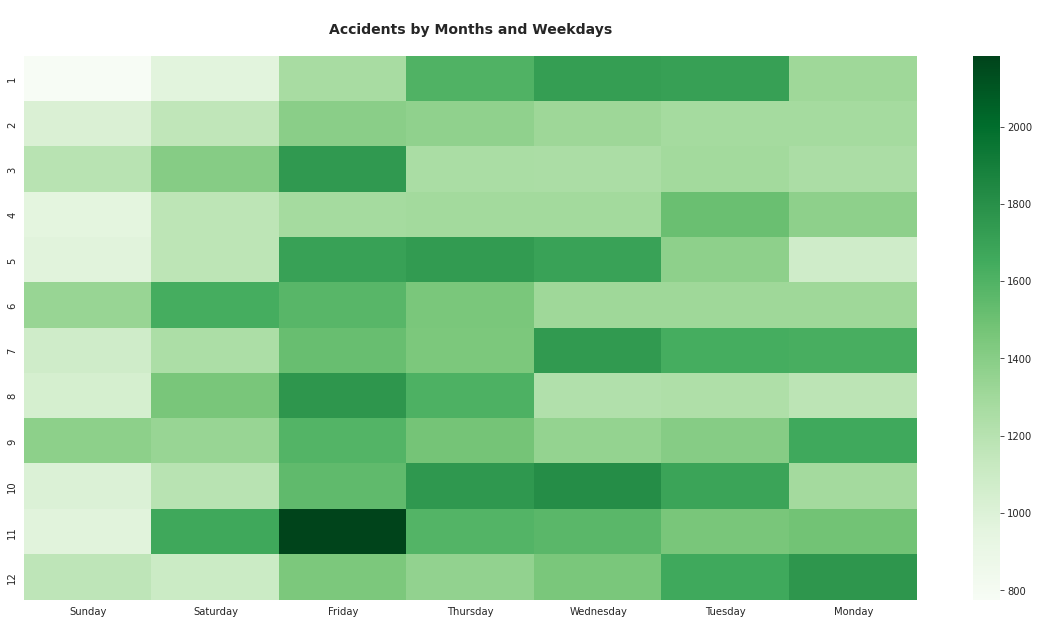

In [59]:
plt.figure(figsize=(20,10))
sns.heatmap(accident_table, cmap='Greens')
plt.title('\nAccidents by Months and Weekdays\n', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('');

In [60]:
accidents.describe().T


,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,117445.0,452383.893559,95044.765076,64084.000000,387996.000000,459377.000000,529367.000000,6.552440e+05
Location_Northing_OSGR,117445.0,278683.762076,150940.107301,10814.000000,175517.000000,218510.000000,384776.000000,1.167366e+06
Longitude,117445.0,-1.249720,1.392530,-7.525273,-2.181050,-1.123460,-0.135556,1.757476e+00
Latitude,117445.0,52.395409,1.359561,49.917760,51.465853,51.852965,53.357102,6.038864e+01
Police_Force,117473.0,28.239715,24.622464,1.000000,5.000000,23.000000,45.000000,9.800000e+01
Accident_Severity,117473.0,2.772484,0.451625,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,117473.0,1.840985,0.708427,1.000000,1.000000,2.000000,2.000000,1.700000e+01
Number_of_Casualties,117473.0,1.303082,0.754250,1.000000,1.000000,1.000000,1.000000,5.200000e+01
Day_of_Week,117473.0,4.111106,1.920073,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),117473.0,326.809829,256.488145,1.000000,84.000000,305.000000,514.000000,9.410000e+02


# **MOTORBIKES ACCIDENTS**





In [61]:
#I SELECTED DIFFERENT MOTORBIKES ACCORDING TO THEIR ENCODED NUMBERS AND PUT THEM TOGETHER TO GENERATE A VISUALIZATION
Moto2 = data[data["Vehicle_Type"]==2]


In [62]:
Moto3 = data[data["Vehicle_Type"]==3]

In [63]:
Moto4 = data[data["Vehicle_Type"]==4]


In [64]:
Moto5 = data[data["Vehicle_Type"]== 5]

In [65]:
Moto6 = data[data["Vehicle_Type"]== 23]

In [66]:
Moto7 = data[data["Vehicle_Type"]== 97]

In [67]:
Motorbikes = pd.concat([ Moto2, Moto3, Moto4, Moto5, Moto6, Moto7], ignore_index=True, sort=False)

In [68]:
Motorbikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Accident_Index                1553 non-null   object        
 1   Accident_Severity             1553 non-null   int64         
 2   Date                          1553 non-null   datetime64[ns]
 3   Day_of_Week                   1553 non-null   int64         
 4   Vehicle_Type                  1553 non-null   object        
 5   Light_Conditions              1553 non-null   object        
 6   Number_of_Casualties          1553 non-null   int64         
 7   Time                          1553 non-null   object        
 8   Weather_Conditions            1553 non-null   int64         
 9   Age_Band_of_Driver            1553 non-null   object        
 10  Vehicle_Manoeuvre             1553 non-null   object        
 11  Age_of_Vehicle                

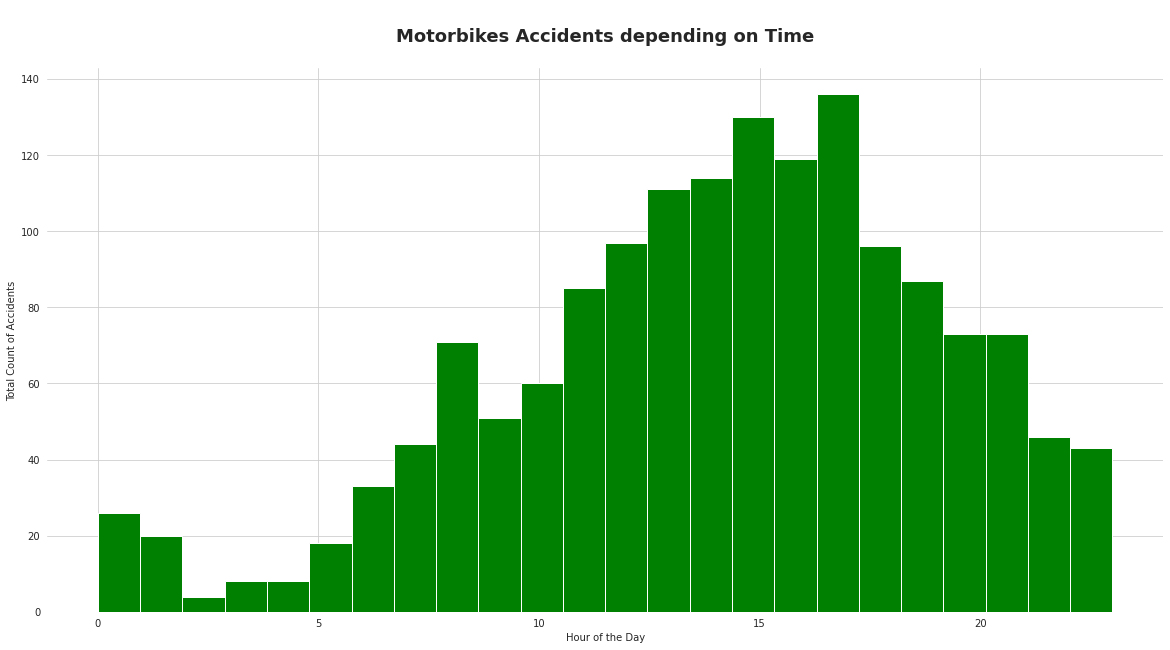

In [69]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(20,10))

# plot

Motorbikes.Hour.hist(bins=24, ax=ax, color='green')
ax.set_title('\nMotorbikes Accidents depending on Time\n', fontsize=18, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Total Count of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

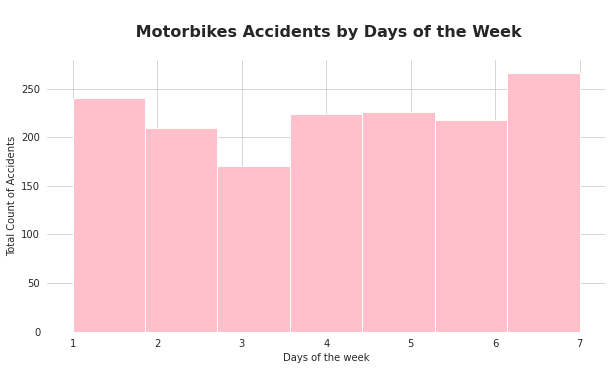

In [70]:
# prepare plot
#Sunday ==1
#Monday ==2
#Tuesday ==3
#Wednesay ==4
#Thursday ==5
#Friday ==6
#Saturday ==7
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))

# plot
Motorbikes.Day_of_Week.hist(bins=7, ax=ax, color='pink')
ax.set_title('\n Motorbikes Accidents by Days of the Week\n', fontsize=16, fontweight='bold')
ax.set(xlabel='Days of the week', ylabel='Total Count of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

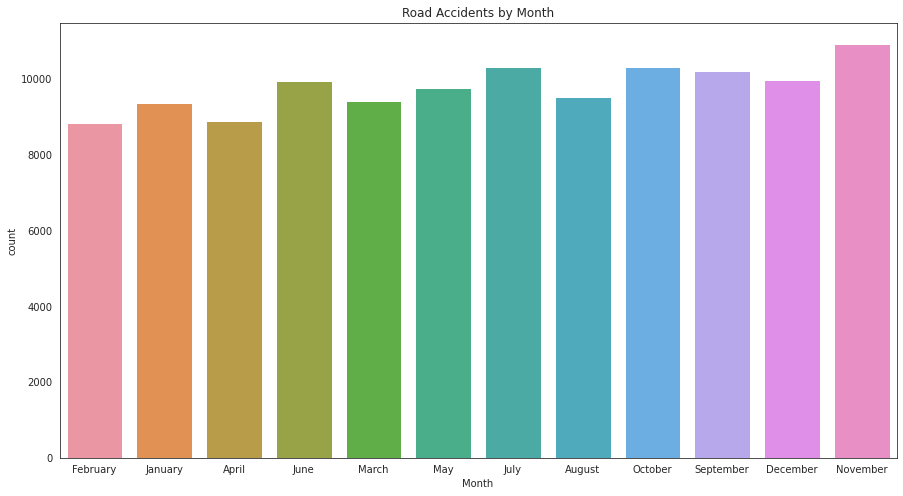

In [71]:
# calculate how many accidents for the month represented in the dataframe

# The months of the year with January = 1, December = 12.

plt.figure(figsize=(15,8))

sns.countplot(x='Month',data=accidents)

plt.title("Road Accidents by Month");

# **How fatalities has developed over the month?**

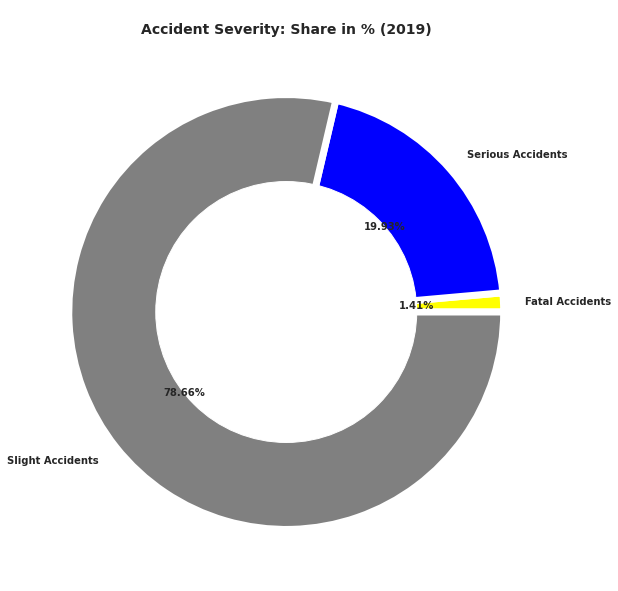

In [72]:
# assign the data
fatal   = accidents.Accident_Severity.value_counts()[1]
serious = accidents.Accident_Severity.value_counts()[2]
slight  = accidents.Accident_Severity.value_counts()[3]

names = ['Fatal Accidents','Serious Accidents', 'Slight Accidents']
size  = [fatal, serious, slight]
#explode = (0.2, 0, 0)

# create a pie chart
plt.pie(x=size, labels=names, colors=['yellow', 'blue', 'grey'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(20,10)
fig.gca().add_artist(my_circle)
plt.title('\nAccident Severity: Share in % (2019)', fontsize=14, fontweight='bold')
plt.show()

In [73]:
m_df = accidents[['Date', 'Accident_Index', 'Accident_Severity']]

# pull out the year
year = m_df['Date'].dt.year
week = m_df['Date'].dt.week

# groupby year and severities
fatalities_count = m_df.set_index('Date').groupby([pd.Grouper(freq='W'), 'Accident_Severity']).size()

# build a nice table
fatalities_tab = fatalities_count.rename_axis(['Week', 'Accident_Severity'])\
                                      .unstack('Accident_Severity')\
                                      .rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
fatalities_tab.head()

Accident_Severity,fatal,serious,slight
Week,,,
2019-01-06,29,256,973
2019-01-13,48,406,1733
2019-01-20,31,399,1771
2019-01-27,38,398,1853
2019-02-03,30,414,1857


In [74]:
accidents['Accident_Severity'].head()

0    3
1    3
2    3
3    2
4    3
Name: Accident_Severity, dtype: int64

## **CASUALTIES**

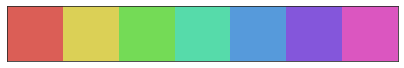

In [75]:
# create color palette with 7 colors (for use with day of the week analysis)
sevenColorPalette = sns.color_palette('hls', 7)
seven = sns.palplot(sevenColorPalette)



plt.show(seven)


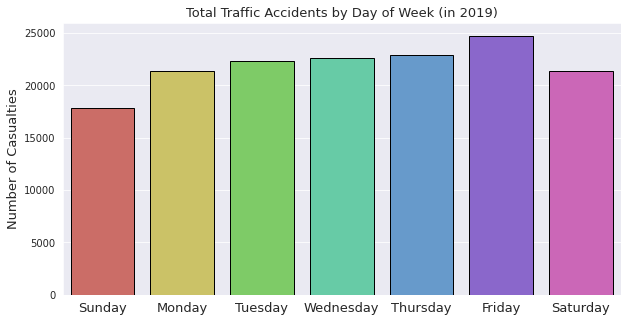

In [76]:
# TRAFFIC ACCIDENT CASUALTIES BY DAY OF WEEK AND TIME OF DAY 

# Create dataframe for Casualties by Day of Week and Hour of Day
accidents_by_weeknum = accidents.groupby(['Day_of_Week']).sum()['Number_of_Casualties'].to_frame().reset_index()
accidents_by_date = accidents.groupby(['Date', 
                                        'Day_of_Week', 
                                        'Month']).sum()['Number_of_Casualties'].to_frame().reset_index()
accidents_by_hour = accidents.groupby(['Day_of_Week',
                                        'Hour']).sum()['Number_of_Casualties'].to_frame().reset_index()
accidents_by_hour_pivot = accidents_by_hour.pivot_table(values=['Number_of_Casualties'], 
                                                        index=['Hour'], 
                                                        columns=['Day_of_Week'])
accidents_by_hour_pivot.columns = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

# Plot bars for Number of Casualties by Day of Week
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
b = sns.barplot(x='Day_of_Week', y='Number_of_Casualties', data=accidents_by_weeknum,
                palette=sevenColorPalette, linewidth=1, edgecolor='black')

# Define x_axis for xticks
x_axis = np.arange(0,7,1)


#plt.tick_params(axis='y', which='major', direction='out', length=2, color='gray')
plt.xticks(x_axis, ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), fontsize=13)

plt.xlabel('')
plt.ylabel('Number of Casualties', fontsize=13)



plt.title('Total Traffic Accidents by Day of Week (in 2019)', fontsize=13)

plt.show()

No handles with labels found to put in legend.


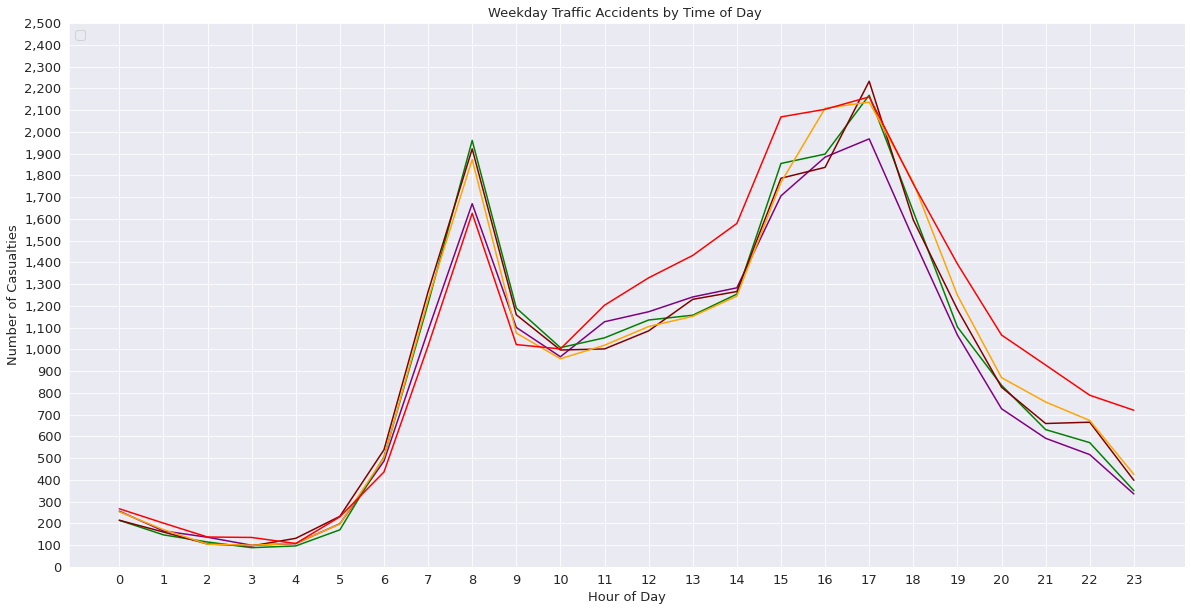

In [77]:
x_axis = accidents_by_hour_pivot.index

# Plot each weekday and assigning color to be consistent with previous charts
plt.figure(figsize=(20,10))
plt.plot(x_axis, accidents_by_hour_pivot['Monday'], color='purple')
plt.plot(x_axis, accidents_by_hour_pivot['Tuesday'], color='green')
plt.plot(x_axis, accidents_by_hour_pivot['Wednesday'], color='maroon')
plt.plot(x_axis, accidents_by_hour_pivot['Thursday'], color='orange')
plt.plot(x_axis, accidents_by_hour_pivot['Friday'], color='red')

# Determine y-axis
y_max = 2500
step = 100
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(np.arange(len(x_axis)), x_axis, fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)
plt.xlabel('Hour of Day', fontsize=13)
plt.ylabel('Number of Casualties', fontsize=13)

plt.legend(fontsize=13, loc='upper left')
plt.title("Weekday Traffic Accidents by Time of Day ", fontsize=13)

plt.show()

No handles with labels found to put in legend.


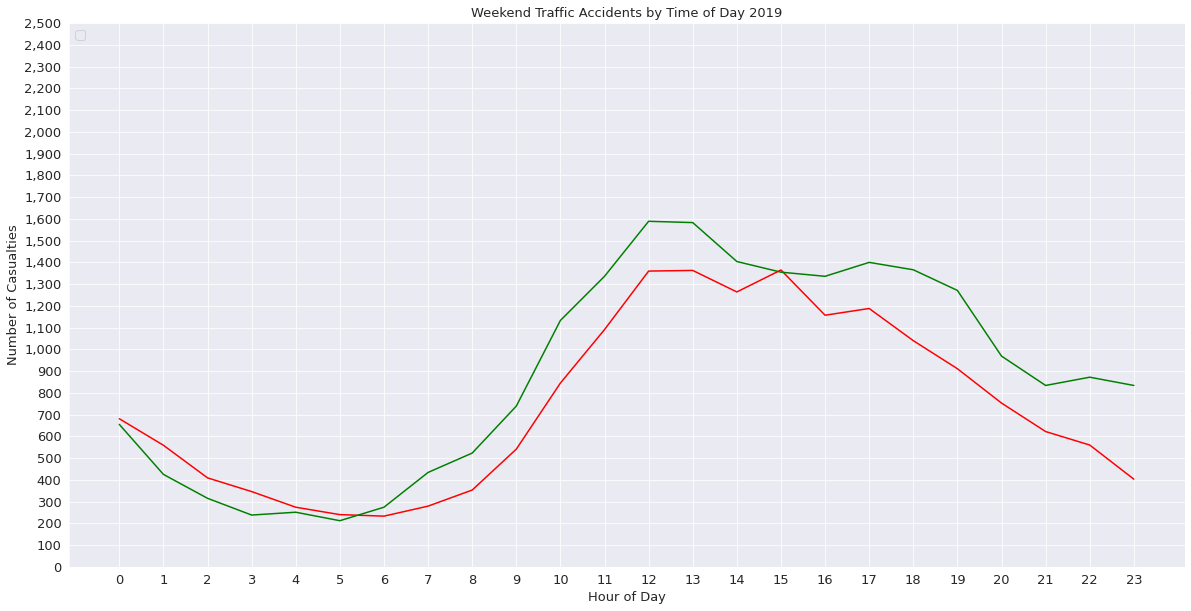

In [78]:
# Plot for Weekends
plt.figure(figsize=(20,10))
plt.plot(accidents_by_hour_pivot['Sunday'], color='red')
plt.plot(accidents_by_hour_pivot['Saturday'], color='green')

# Determine y-axis
y_max = 2500
step = 100
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(np.arange(len(x_axis)), x_axis, fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)
plt.xlabel('Hour of Day', fontsize=13)
plt.ylabel('Number of Casualties', fontsize=13)

plt.legend(fontsize=13, loc='upper left')
plt.title("Weekend Traffic Accidents by Time of Day 2019", fontsize=13)

plt.show()

In [79]:
casualties.describe().T


,count,mean,std,min,25%,50%,75%,max
Vehicle_Reference,93593.0,1.392508,0.524843,1.0,1.0,1.0,2.0,14.0
Casualty_Reference,93593.0,1.014969,0.916065,1.0,1.0,1.0,1.0,256.0
Casualty_Class,93593.0,1.498670,0.816820,1.0,1.0,1.0,2.0,3.0
Casualty_Severity,93593.0,2.785497,0.437103,1.0,3.0,3.0,3.0,3.0
Pedestrian_Movement,93593.0,0.862105,2.237583,0.0,0.0,0.0,0.0,9.0


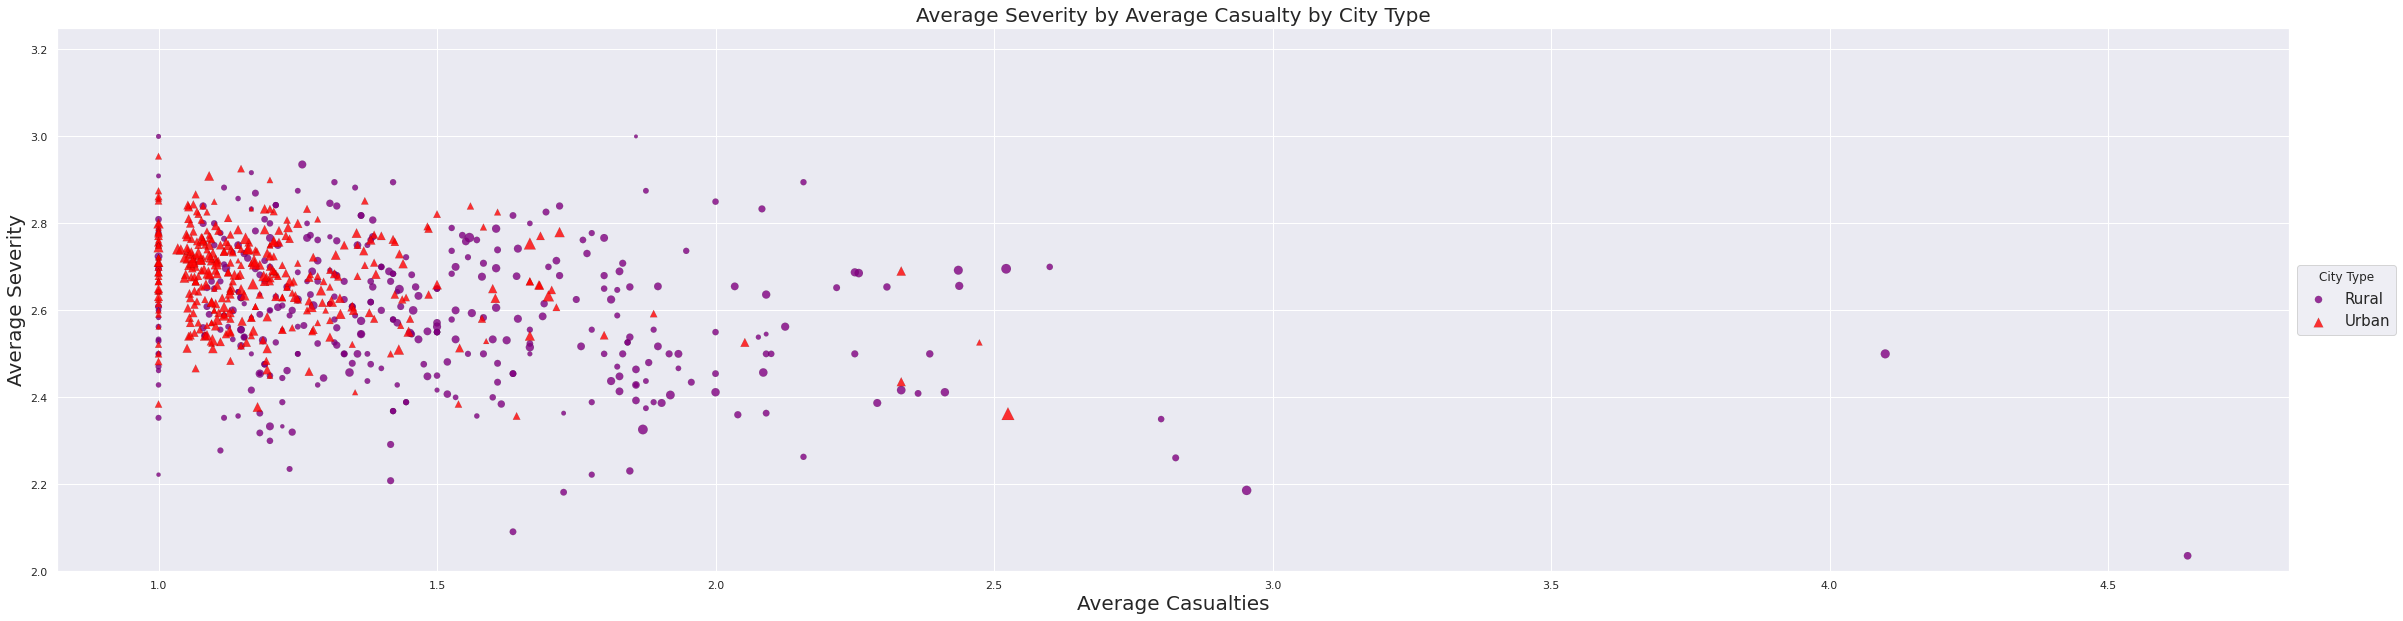

In [80]:
urban = data[data["Urban_or_Rural_Area"] == 1]
rural = data[data["Urban_or_Rural_Area"] == 2]

# Calculations by City Type
r_mean_1 = rural.groupby(["Date"]).mean()["Accident_Severity"]
r_mean_2 = rural.groupby(["Date"]).mean()["Number_of_Casualties"]
r_count_3 = rural.groupby(["Date"]).count()["Accident_Index"]

ur_mean_1 = urban.groupby(["Date"]).mean()["Accident_Severity"]
ur_mean_2 = urban.groupby(["Date"]).mean()["Number_of_Casualties"]
ur_count_3 = urban.groupby(["Date"]).count()["Accident_Index"]

#Set Parameters for Scatterplot
plt.rcParams["figure.figsize"] = [40,10]
sns.set()

plt.title("Average Severity by Average Casualty by City Type", size=20)
plt.ylabel("Average Severity", size=20)
plt.xlabel("Average Casualties", size=20)
plt.ylim([2, 3.25])
plt.scatter(r_mean_2,
            r_mean_1,
            color="purple",
            s=r_count_3*2,
            edgecolor="black", linewidths= 0.1,
            alpha=0.8, label="Rural")

plt.scatter(ur_mean_2,
            ur_mean_1,
            color='red',
            s=ur_count_3*2,
            edgecolor="black", linewidths=0.1, marker="^", 
            alpha=0.8, label="Urban")

#Set Legend 
plt.legend(title='City Type', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)


plt.show()

# **PEDESTRIAN ACCIDENTS**




In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20563 entries, 0 to 20574
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Accident_Index                20563 non-null  object        
 1   Accident_Severity             20563 non-null  int64         
 2   Date                          20563 non-null  datetime64[ns]
 3   Day_of_Week                   20563 non-null  int64         
 4   Vehicle_Type                  20563 non-null  object        
 5   Light_Conditions              20563 non-null  object        
 6   Number_of_Casualties          20563 non-null  int64         
 7   Time                          20563 non-null  object        
 8   Weather_Conditions            20563 non-null  int64         
 9   Age_Band_of_Driver            20563 non-null  object        
 10  Vehicle_Manoeuvre             20563 non-null  object        
 11  Age_of_Vehicle              

In [82]:
# use the groupby function to combine data into clusters based on specified criterion
#find the sum of the values for each group
#number of casualties by driver age-group

casualties_by_ped_location = AccCas_df.groupby('Pedestrian_Location')[['Number_of_Casualties']].sum().sort_values('Number_of_Casualties', ascending=False)
casualties_by_ped_location


,Number_of_Casualties
Pedestrian_Location,
0,143467
5,5948
6,2123
1,1835
9,1400
10,1274
4,871
8,624
7,137


In [83]:
Pedestrian_Casualties = data[data["Casualty_Type"]==0]

In [84]:
Pedestrian_Casualties

,Accident_Index,Accident_Severity,Date,Day_of_Week,Vehicle_Type,Light_Conditions,Number_of_Casualties,Time,Weather_Conditions,Age_Band_of_Driver,...,Urban_or_Rural_Area,Pedestrian_Movement,Pedestrian_Location,Was_Vehicle_Left_Hand_Drive?,Age_of_Vehicle,Year,Month_number,Month,Hour,Daytime
1,2019040853512,3,2019-06-12,4,9,1,1,17:40,2,7,...,1,4,5,1,12,2019,6,June,17,afternoon rush (15-19)
2,2019040853513,3,2019-06-13,5,9,1,1,08:30,2,NaN,...,2,7,9,1,NaN,2019,6,June,8,morning rush (5-10)
3,2019040853514,2,2019-06-13,5,9,1,1,08:17,2,7,...,1,2,5,1,10,2019,6,June,8,morning rush (5-10)
4,2019040853516,2,2019-06-13,5,9,1,1,13:30,2,8,...,2,3,5,1,13,2019,6,June,13,office hours (10-15)
5,2019040853519,2,2019-06-13,5,9,1,1,19:22,1,6,...,1,9,5,1,11,2019,6,June,19,evening (19-23)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20555,2019983114119,2,2019-06-01,7,9,4,1,22:40,1,7,...,1,1,5,1,1,2019,6,June,22,evening (19-23)
20558,2019983115619,3,2019-06-19,4,19,1,1,13:55,1,8,...,1,8,9,1,2,2019,6,June,13,office hours (10-15)
20565,2019984104219,2,2019-04-05,6,9,1,1,13:15,1,10,...,1,9,6,1,8,2019,4,April,13,office hours (10-15)
20566,2019984104419,3,2019-04-09,3,9,4,1,02:30,1,7,...,1,9,6,1,5,2019,4,April,2,night (23-5)


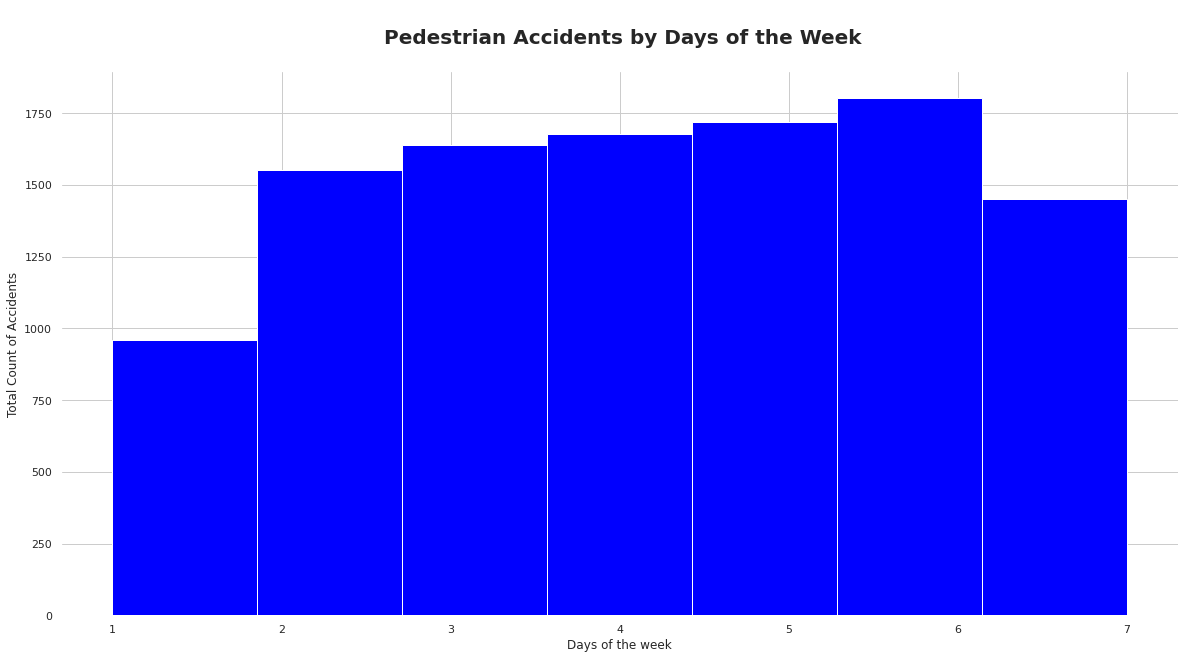

In [85]:
#Sunday ==1
#Monday ==2
#Tuesday ==3
#Wednesay ==4
#Thursday ==5
#Friday ==6
#Saturday ==7
sns.set_style('white')
fig, ax = plt.subplots(figsize=(20,10))
colors= ['blue']
# plot
Pedestrian_Casualties.Day_of_Week.hist(bins=7, ax=ax, color= colors)
ax.set_title('\n Pedestrian Accidents by Days of the Week\n', fontsize=20, fontweight='bold')
ax.set(xlabel='Days of the week', ylabel='Total Count of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

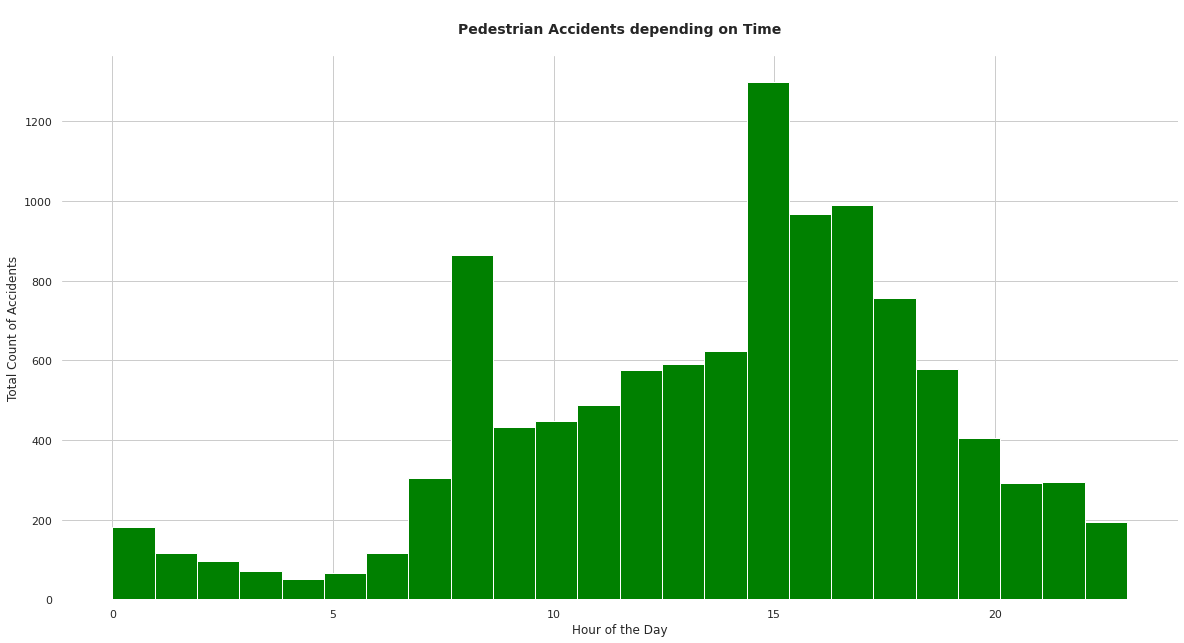

In [86]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(20,10))

# plot

Pedestrian_Casualties.Hour.hist(bins=24, ax=ax, color='green')
ax.set_title('\nPedestrian Accidents depending on Time\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Total Count of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

# **EFFECT OF DALIGHT SAVING**

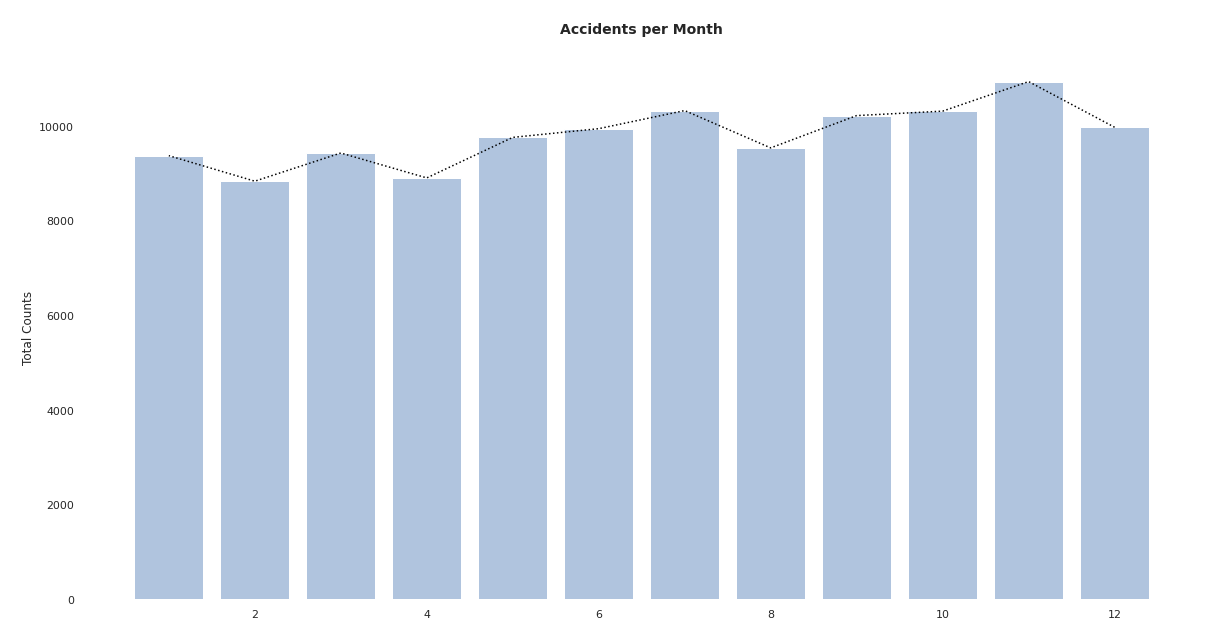

In [87]:

monthly_count = accidents['Date'].dt.month.value_counts().sort_index(ascending=False)

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(20,10))

# plot
ax.bar(monthly_count.index, monthly_count.values, color='lightsteelblue')
ax.plot(monthly_count, linestyle=':', color='black')
ax.set_title('\nAccidents per Month\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Counts')

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

# **LIGHT CONDITION**

In [88]:
# rename the values to be more convenient for the reader resp. viewer
data['Weather_Conditions'] = data['Weather_Conditions'].map({1: 'Fine No High Winds', 2: 'Raining High winds', 3: 'Snowing No High Winds', 4: 'Fine Plus High Winds', 5:'Raining Plus High Winds', 6:'Snowing Plus High Winds', 
                                                                         7:'Fog or Mist', 8:'Other', 9:'Unknown'})
data['Road_Surface_Conditions'] = data['Road_Surface_Conditions'].map({1: 'Dry', 2: 'Wet or Damp', 3: 'Snow',
                                                                  4: 'Frost or ice', 5: 'Flood over 3cm deep', 6: 'Oil or Diesel',
                                                                   7: 'Mud'})
# rename the values to be more convenient for the reader resp. viewer
data['Light_Conditions'] = data['Light_Conditions'].map({1: 'Daylight', 4: 'Darkness - lights lit', 5:'Darkness - lights unlit', 6:'Darkness - no lighting', 
                                                                         7:'Darkness - lighting unknown'})

data['Road_Type'] = data['Road_Type'].map({1: 'Roundabout', 2: 'One way street', 3:'Dual carriageway', 6:'Single carriageway', 
                                                                         7:'Slip road', 9:'Unknown', 12:'One way street/Slip road'})



In [89]:
data['Light_Conditions'].value_counts()


Daylight                       13125
Darkness - lights lit           4492
Darkness - no lighting          2412
Darkness - lighting unknown      352
Darkness - lights unlit          181
Name: Light_Conditions, dtype: int64

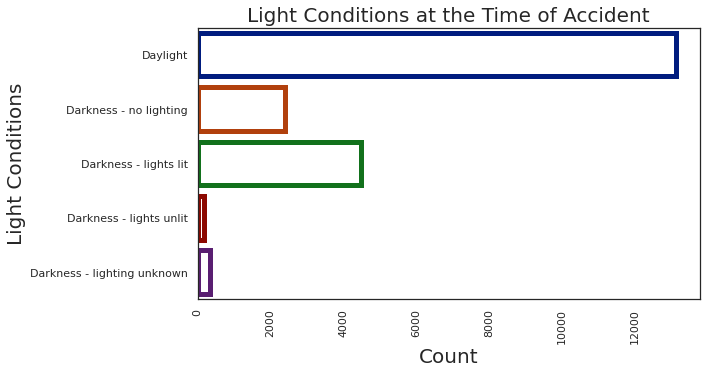

In [90]:
plt.figure(figsize=(9, 5))
plt.rcParams['axes.labelsize'] = 8

sns.countplot(y = "Light_Conditions", data = data,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 9))

plt.xlabel('Count',fontsize = 20)
plt.ylabel('Light Conditions',fontsize = 20);

plt.title('Light Conditions at the Time of Accident',fontsize = 20)
plt.xticks(rotation=90);


In [91]:
data['Vehicle_Manoeuvre'] = data['Vehicle_Manoeuvre'].map({1: 'Reversing', 2: 'Parked', 3: 'Waiting to go - held up', 4: 'Slowing or stopping', 5:'Moving off', 6:'U-turn', 
                                                    7:'Turning left', 8:'Waiting to turn left', 9:'Turning right',10:'Waiting to turn right', 11:'Changing lane to left',
                                                    12:'Changing lane to right',13:'Overtaking moving vehicle - offside', 14:'Overtaking static vehicle - offside',15:'Overtaking - nearside',16:'Going ahead left-hand bend',
                                                    17:'Going ahead right-hand bend', 18:'Going ahead other' })

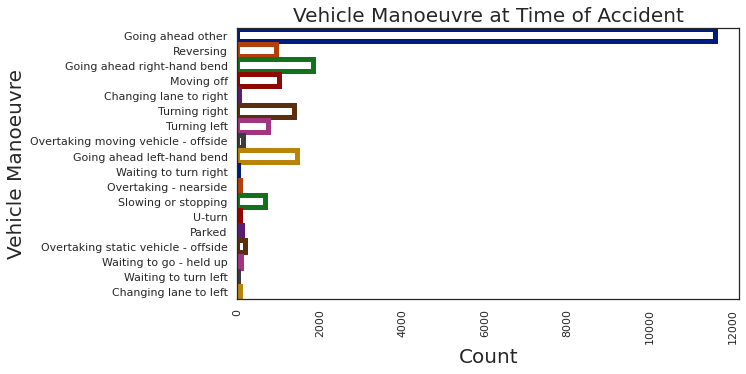

In [92]:
plt.figure(figsize=(9, 5))
plt.rcParams['axes.labelsize'] = 8

sns.countplot(y = "Vehicle_Manoeuvre", data = data,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 9))

plt.xlabel('Count',fontsize = 20)
plt.ylabel('Vehicle Manoeuvre',fontsize = 20);

plt.title('Vehicle Manoeuvre at Time of Accident',fontsize = 20)
plt.xticks(rotation=90);


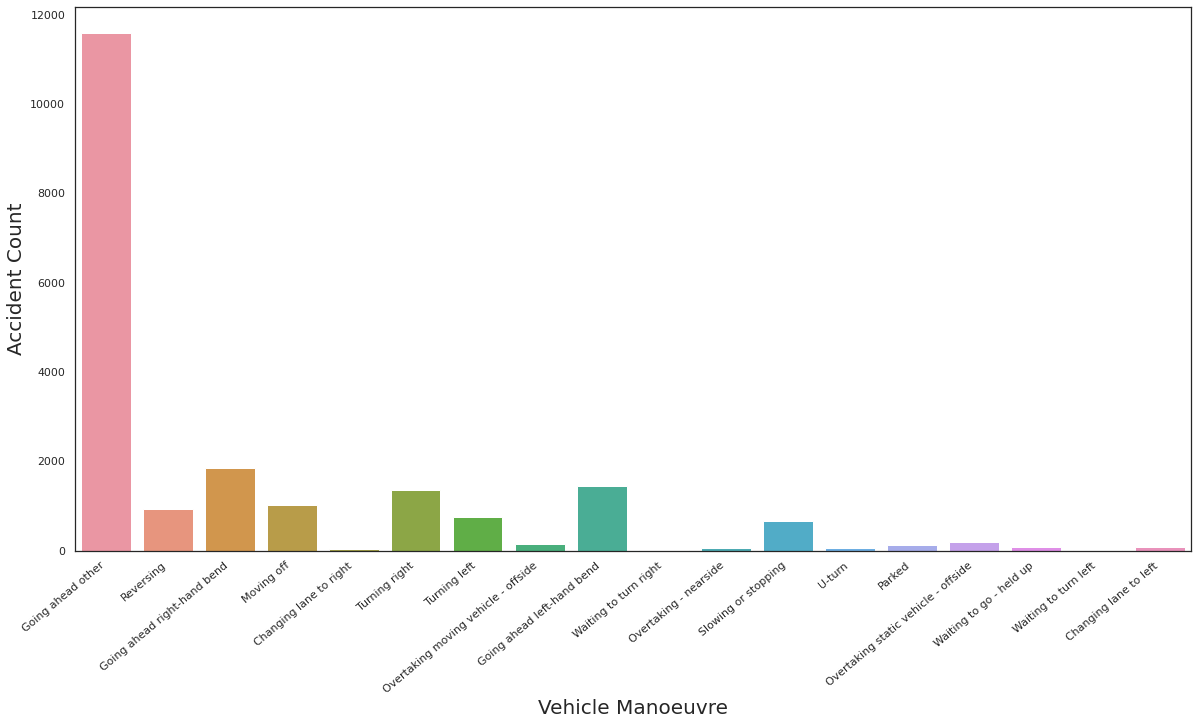

In [93]:
# start with weather conditions first
fig, ax = plt.subplots(figsize=(20,10))

rplot = sns.countplot(data=data,x="Vehicle_Manoeuvre")
plt.xlabel('Vehicle Manoeuvre',fontsize = 20)
plt.ylabel('Accident Count',fontsize = 20);
rplot.set_xticklabels(rplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

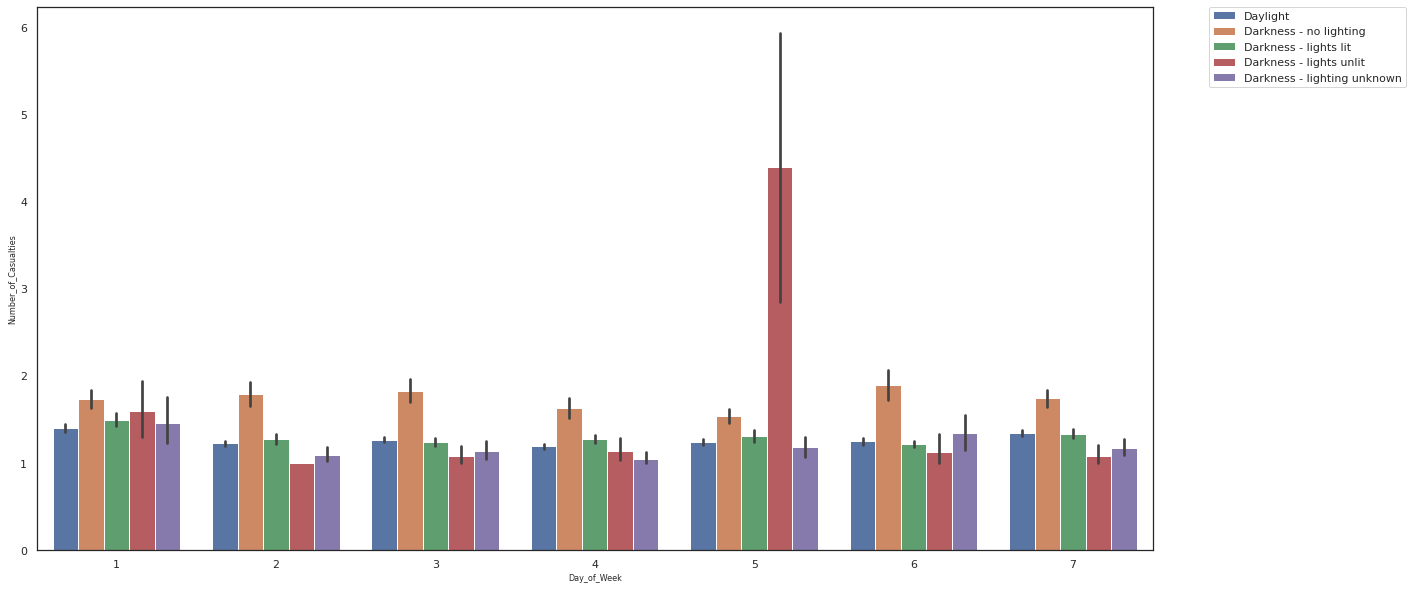

In [94]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot("Day_of_Week", "Number_of_Casualties", hue="Light_Conditions", data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

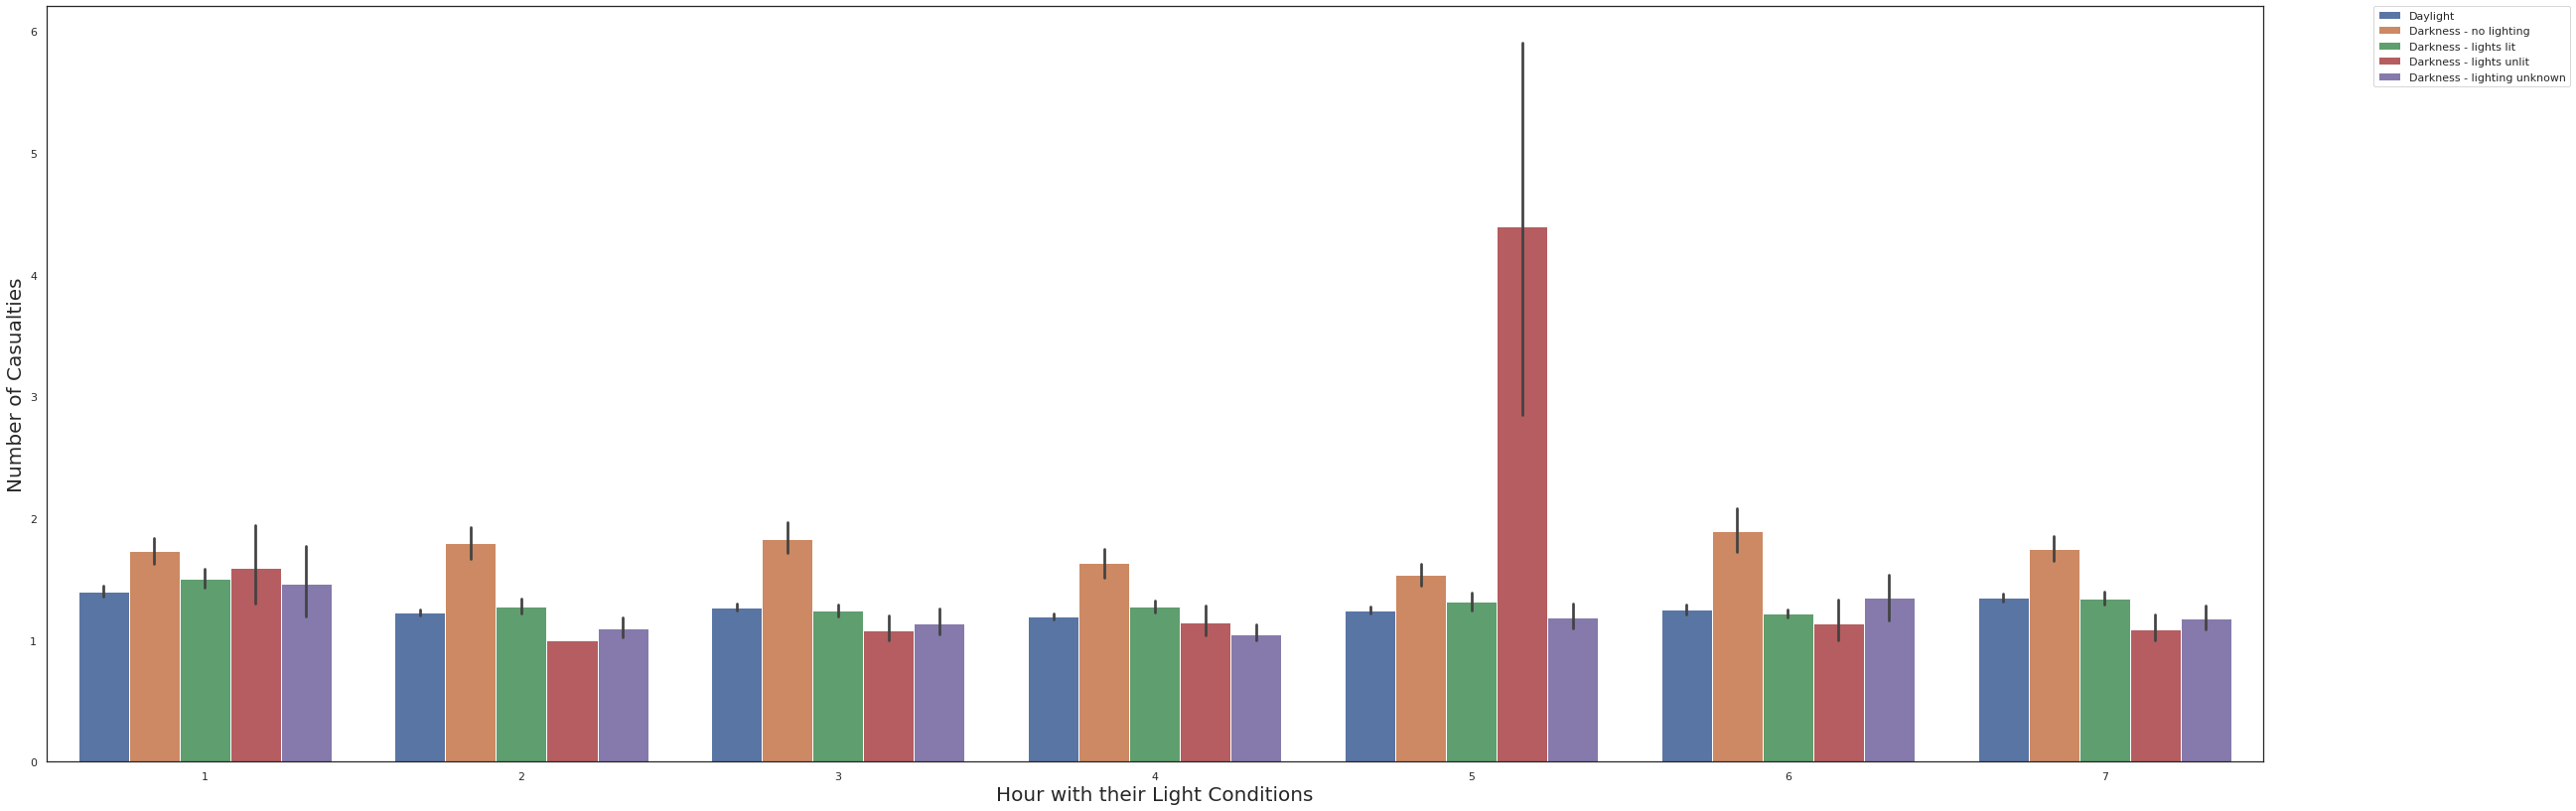

In [95]:
fig, ax = plt.subplots(figsize=(40,14))
sns.barplot("Day_of_Week", "Number_of_Casualties", hue="Light_Conditions", data=data)
plt.xlabel('Hour with their Light Conditions',fontsize = 20)
plt.ylabel('Number of Casualties',fontsize = 20);

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# **EFFECT OF WEATHER CONDITIONS**

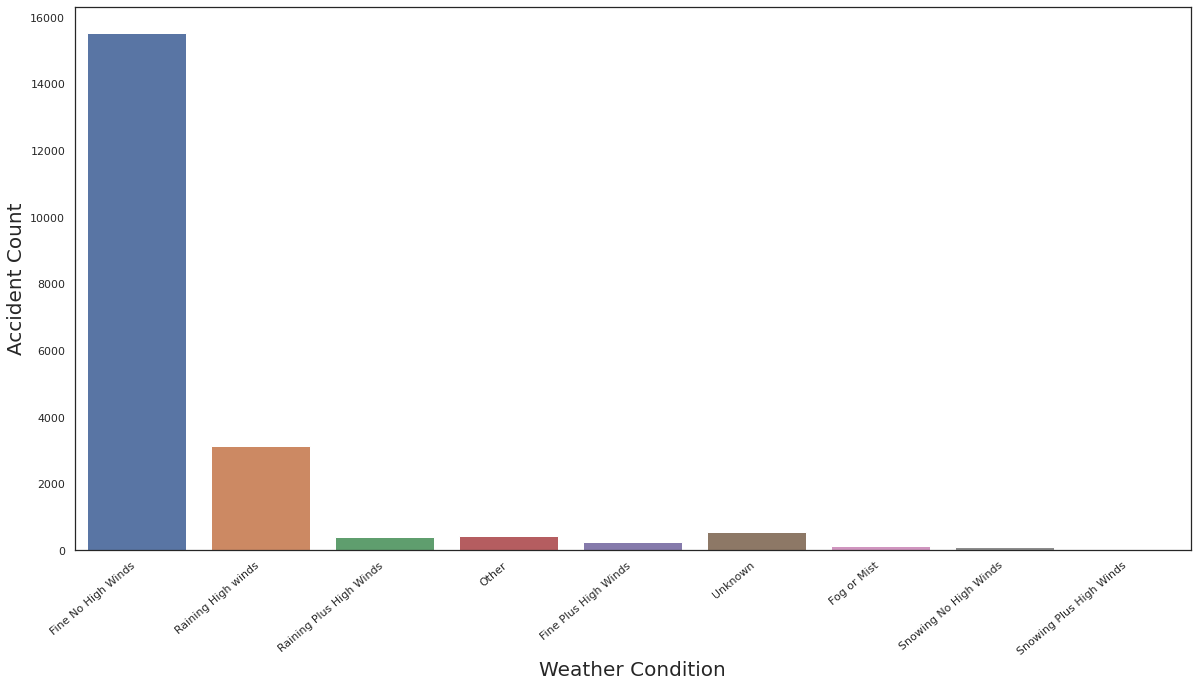

In [96]:
# start with weathe conditions first
fig, ax = plt.subplots(figsize=(20,10))

rplot = sns.countplot(data=data,x="Weather_Conditions")
plt.xlabel('Weather Condition',fontsize = 20)
plt.ylabel('Accident Count',fontsize = 20);
rplot.set_xticklabels(rplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

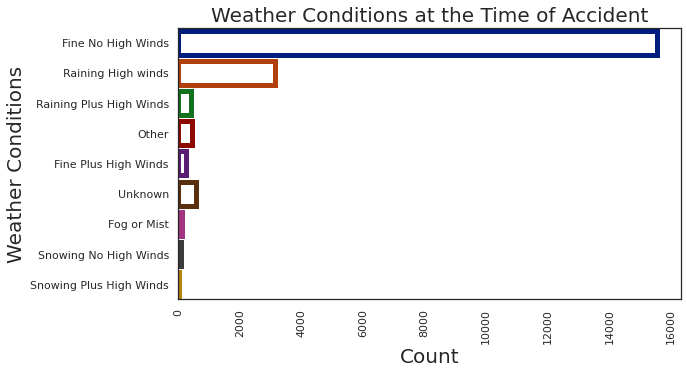

In [97]:
plt.figure(figsize=(9, 5))
plt.rcParams['axes.labelsize'] = 8

sns.countplot(y = "Weather_Conditions", data = data,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 9))

plt.xlabel('Count',fontsize = 20)
plt.ylabel('Weather Conditions',fontsize = 20);

plt.title('Weather Conditions at the Time of Accident',fontsize = 20)
plt.xticks(rotation=90);



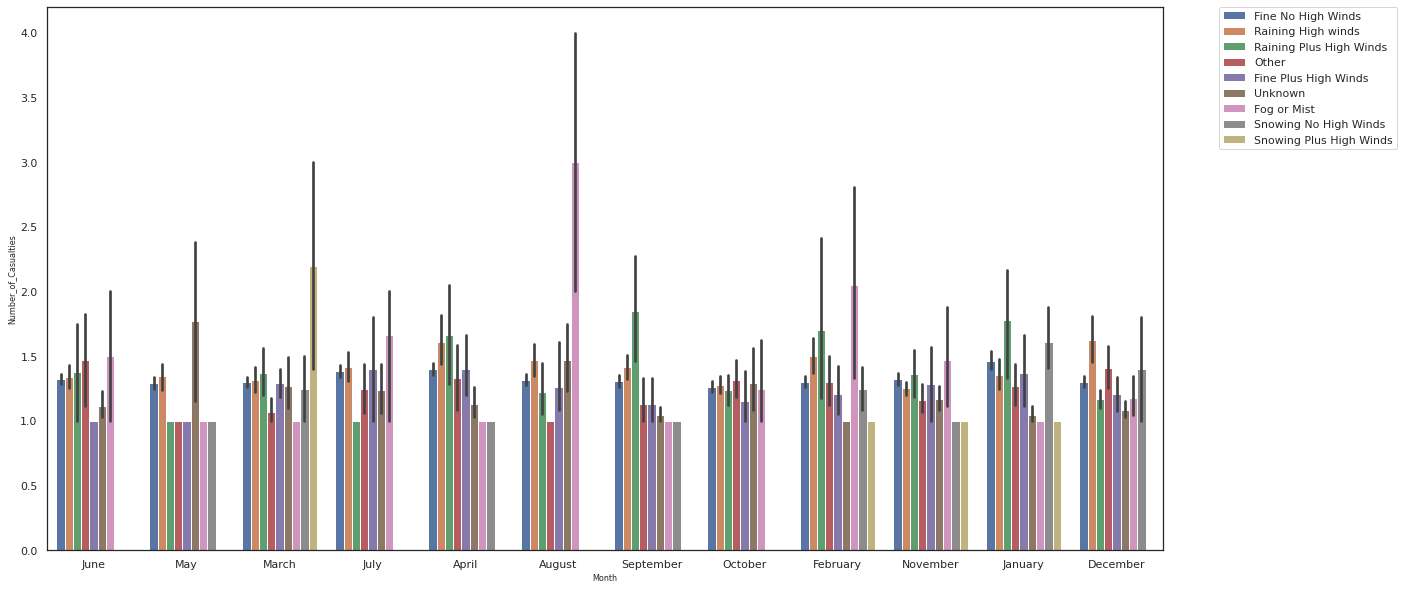

In [98]:
fig, ax = plt.subplots(figsize=(20,10))



sns.barplot("Month", "Number_of_Casualties", hue="Weather_Conditions", data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

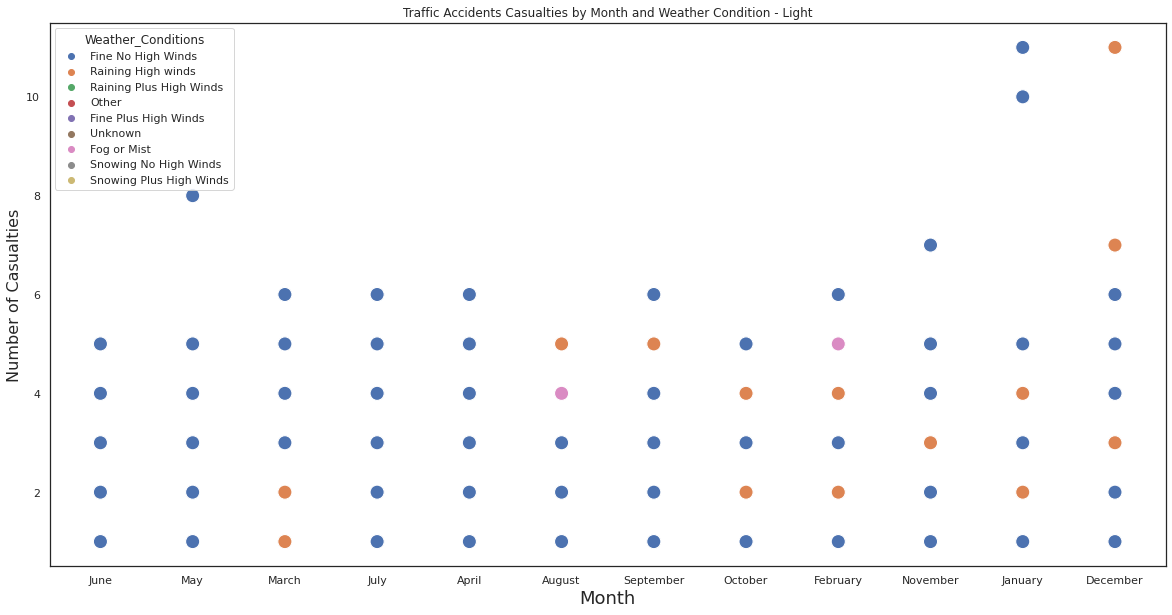

In [99]:
plt.figure(figsize=(20, 10))
#set chart size


#plot graph
sns.scatterplot('Month','Number_of_Casualties', hue='Weather_Conditions', data=data, s=200)

#adjust the size of the labels of the axes 
plt.xlabel('Month', fontsize=18)
plt.ylabel('Number of Casualties', fontsize=16)

#move legend outside of plot area


#chart title
plt.title("Traffic Accidents Casualties by Month and Weather Condition - Light");

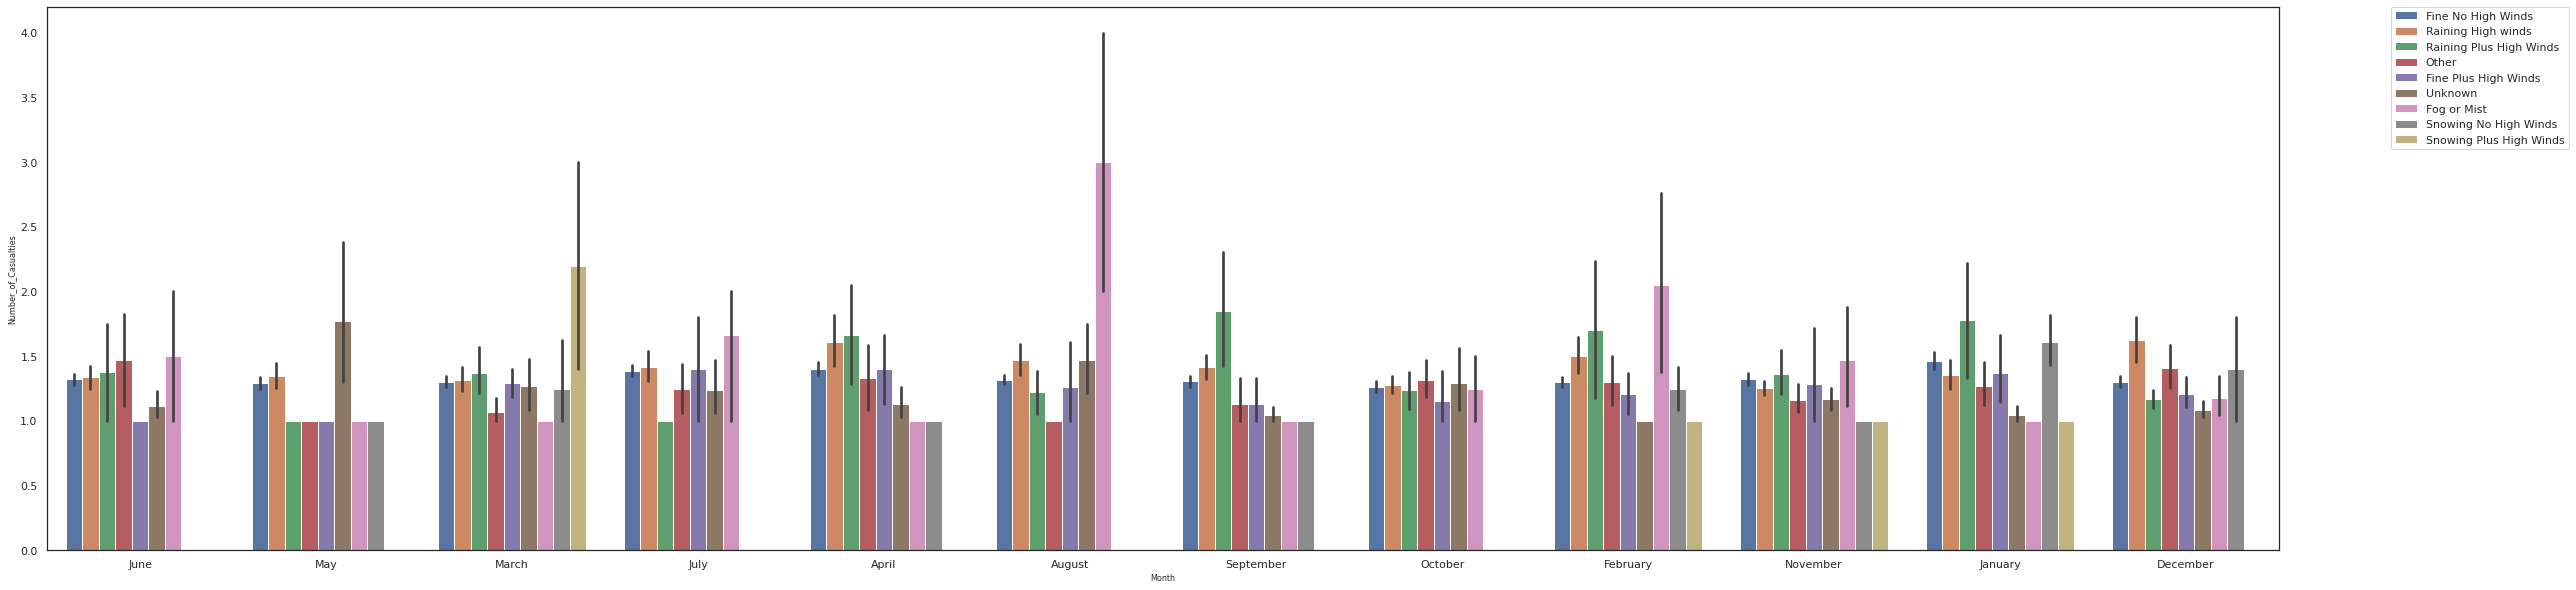

In [100]:
fig, ax = plt.subplots(figsize=(40,10))



sns.barplot("Month", "Number_of_Casualties", hue="Weather_Conditions", data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# **ROAD SURFACE TYPES**

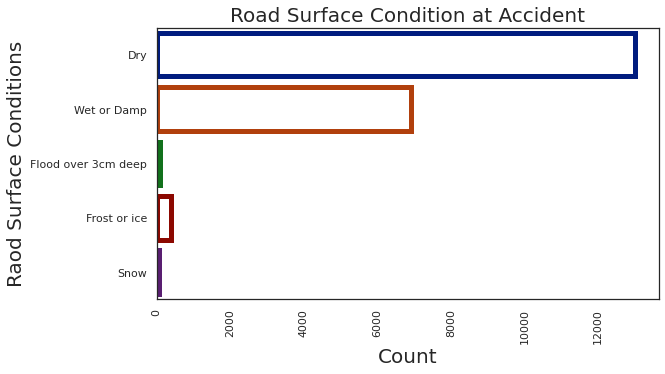

In [101]:
plt.figure(figsize=(9, 5))
plt.rcParams['axes.labelsize'] = 8

sns.countplot(y = "Road_Surface_Conditions", data = data,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 9))

plt.xlabel('Count',fontsize = 20)
plt.ylabel('Raod Surface Conditions',fontsize = 20);

plt.title('Road Surface Condition at Accident',fontsize = 20)
plt.xticks(rotation=90);


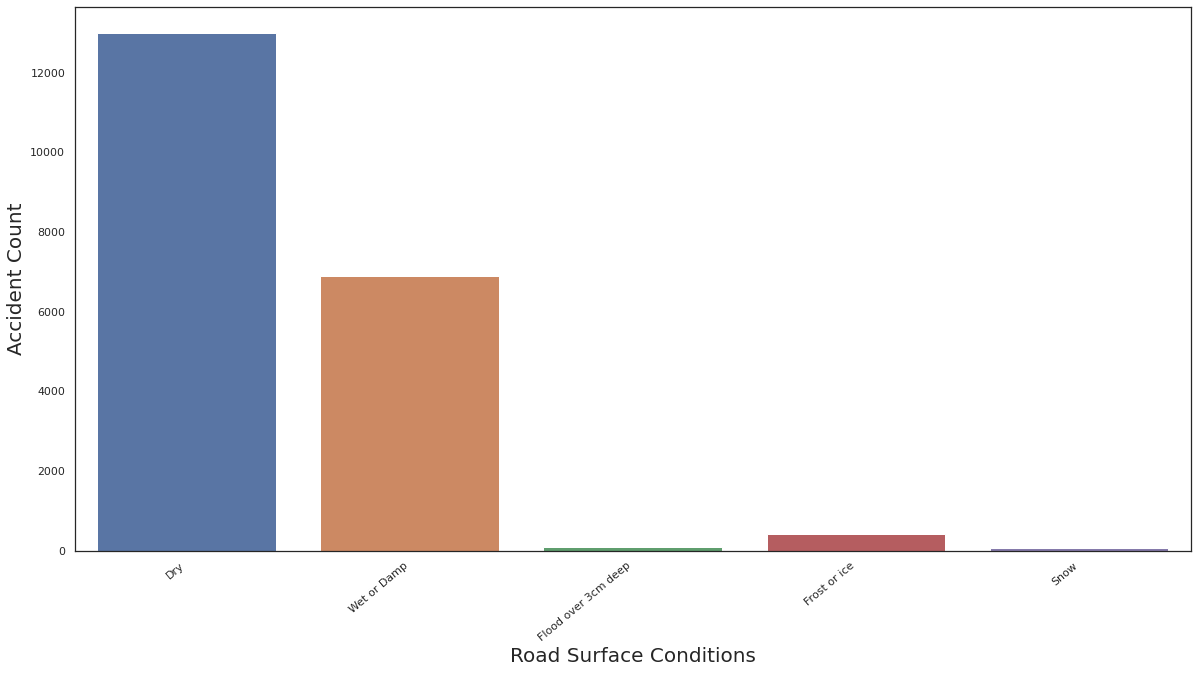

In [102]:
# road surface against accidents
fig, ax = plt.subplots(figsize=(20,10))

rplot = sns.countplot(data=data,x="Road_Surface_Conditions")
plt.xlabel('Road Surface Conditions',fontsize = 20)
plt.ylabel('Accident Count',fontsize = 20);
rplot.set_xticklabels(rplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

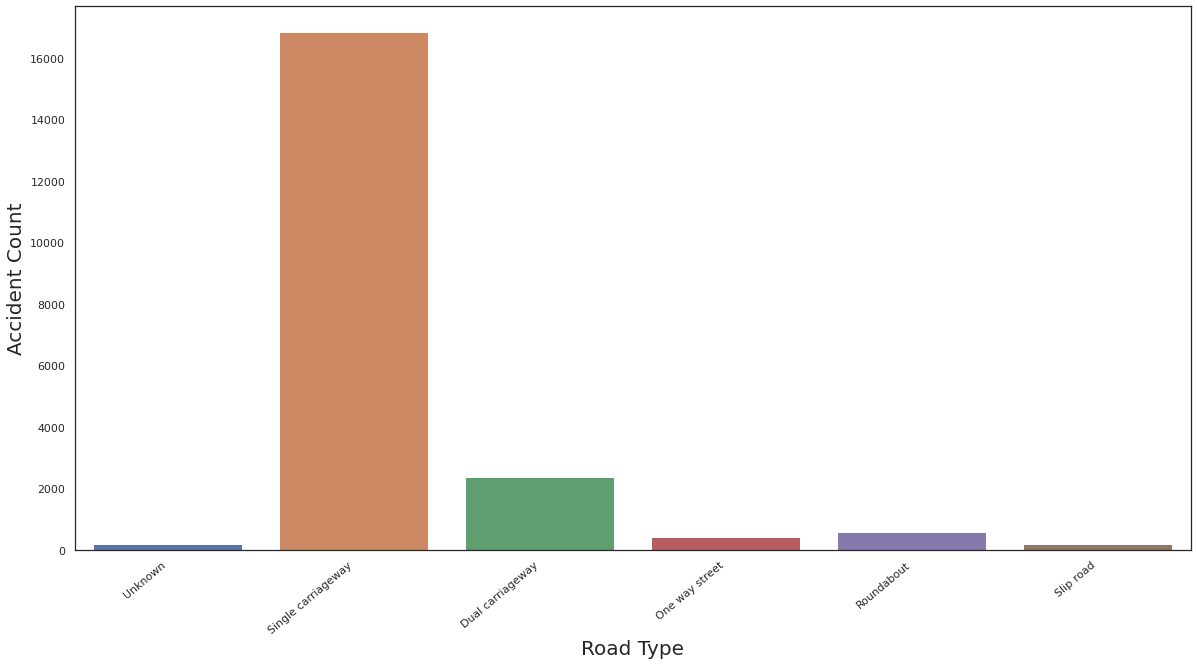

In [103]:
# countplot for speedlimit
fig, ax = plt.subplots(figsize=(20,10))

rplot = sns.countplot(data=data,x="Road_Type")
plt.xlabel('Road Type',fontsize = 20)
plt.ylabel('Accident Count',fontsize = 20);
rplot.set_xticklabels(rplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

# **ENGINE CAPACITY**





In [104]:
#VEHICLE TYPE MAPPING
data['Vehicle_Type'] = data['Vehicle_Type'].map({1: 'Pedals', 2: 'Motorcycle50c', 3: 'Motorcycle125cc', 4: 'Motorcycle over 125cc and up to 500cc', 5:'Motorcycle over 500cc', 8:'Taxi/Private hire car', 
                                                    9:'Car', 10:'Minibus (8 - 16 passenger seats)', 11:'Bus or coach (17 or more pass seats)', 16:'Ridden horse',17:'Agricultural vehicle',18:'Tram',19:'Van / Goods 3.5 tonnes mgw or under',
                                                    20:'Goods over 3.5t. and under 7.5t', 21:'Goods 7.5 tonnes mgw and over', 22:'Mobility scooter', 23:'Electric motorcycle', 90:'Other vehicle',97:'Motorcycle - unknown cc', 98:'Goods vehicle - unknown weight'})


In [105]:
#ACCIDENT SEVERITY MAPPING
data['Accident_Severity'] = data['Accident_Severity'].map({1: 'Fatal', 2: 'Serious', 3: 'Slight'})


In [106]:
data['Vehicle_Type']

0                                        Car
1                                        Car
2                                        Car
3                                        Car
4                                        Car
                        ...                 
20570                                    Car
20571    Van / Goods 3.5 tonnes mgw or under
20572    Van / Goods 3.5 tonnes mgw or under
20573                                    Car
20574                  Motorcycle over 500cc
Name: Vehicle_Type, Length: 20563, dtype: object

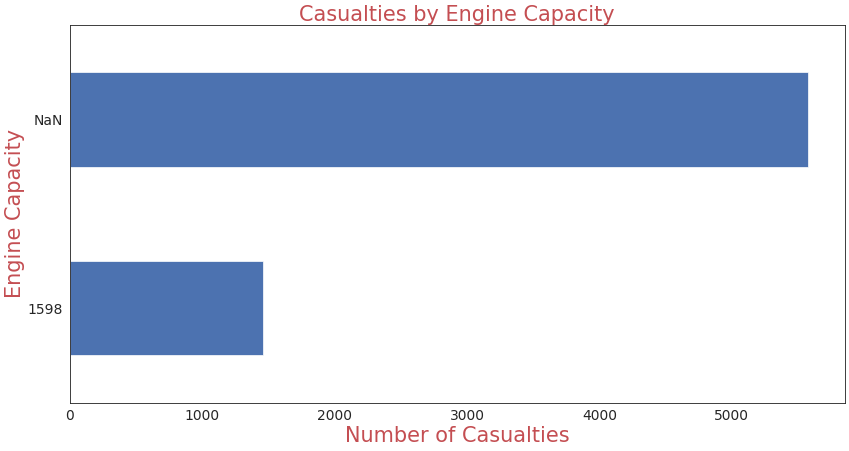

In [107]:
#size of chart that will be plotted
plt.figure(figsize=(20, 10), dpi=50)

# add info for label size and colour
plt.rcParams['axes.labelsize'] = 30
plt.title('Casualties by Engine Capacity',fontsize = 30, c = 'r')

# group data by make
# sum casualties and return values with min count >= 900
# drop Nan values

casmake = data.groupby("Engine_Capacity_(CC)")["Number_of_Casualties"].sum(min_count = 900).dropna().sort_values(ascending = True)

#plot graph
casmake.plot(kind="barh", fontsize=20)

#specify colour and size of the axes
plt.ylabel('Engine Capacity',fontsize = 30, c = 'r')
plt.xlabel('Number of Casualties',fontsize = 30, c = 'r');

# **SPEED LIMIT**

In [108]:
#VEHICLE TYPE MAPPING
data['Speed_limit'] = data['Speed_limit'].map({20: '20 MPH', 30: '30 MPH', 40: '40 MPH', 50: '50 MPH', 60:'60 MPH', 70:'70 MPH'})
                                              
                                              
                                                    

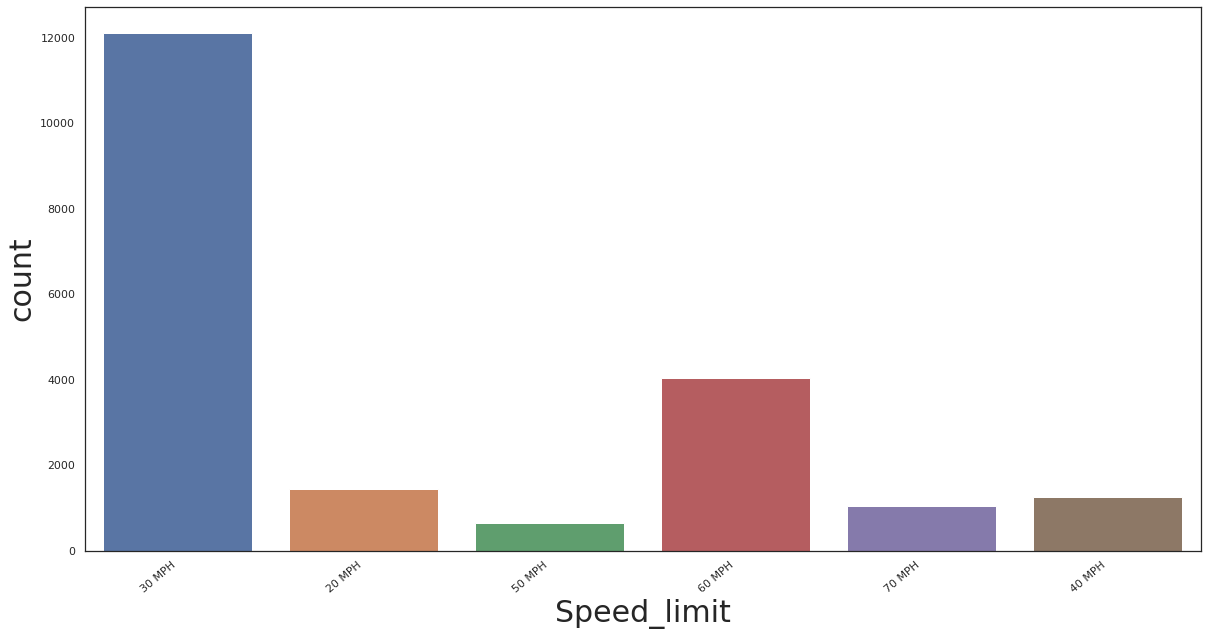

In [109]:
# countplot for speedlimit
fig, ax = plt.subplots(figsize=(20,10))

rplot = sns.countplot(data=data,x="Speed_limit")
rplot.set_xticklabels(rplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [110]:
data['Urban_or_Rural_Area'] = data['Urban_or_Rural_Area'].map({1: 'Urban', 2: 'Rural', 3: 'Unallocated'})

In [111]:
data['Day_of_Week'] = data['Day_of_Week'].map({1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5:'Thursday', 6:'Friday', 
                                                    7:'Saturday'})

In [112]:
data['Vehicle_Manoeuvre'] = data['Vehicle_Manoeuvre'].map({1: 'Reversing', 2: 'Parked', 3: 'Waiting to go - held up', 4: 'Slowing or stopping', 5:'Moving off', 6:'U-turn', 
                                                    7:'Turning left', 8:'Waiting to turn left', 9:'Turning right',10:'Waiting to turn right', 11:'Changing lane to left',
                                                    12:'Changing lane to right',13:'Overtaking moving vehicle - offside', 14:'Overtaking static vehicle - offside',15:'Overtaking - nearside',16:'Going ahead left-hand bend',
                                                    17:'Going ahead right-hand bend', 18:'Going ahead other' })

# **ACCIDENTS LOCATION(RURAL OR URBAN)**

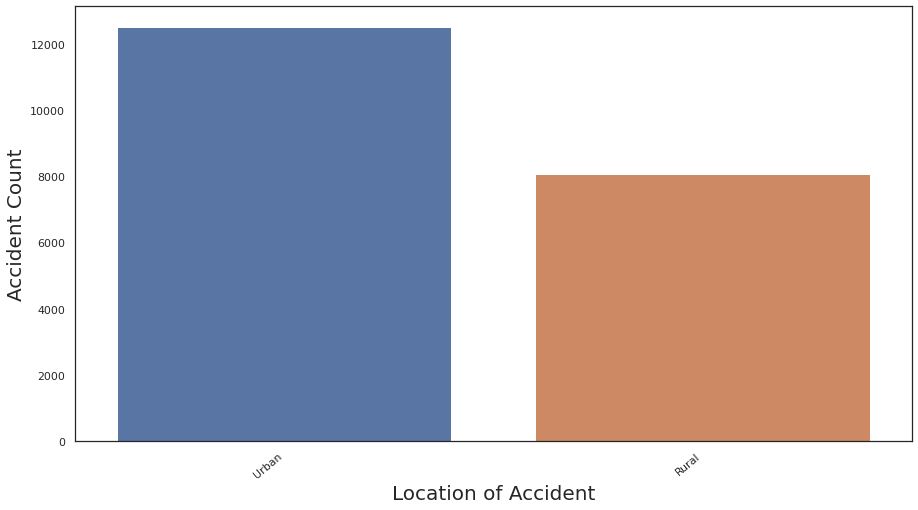

In [113]:
#location of accidents
fig, ax = plt.subplots(figsize=(15,8))

rplot = sns.countplot(data=data,x="Urban_or_Rural_Area")
plt.xlabel('Location of Accident',fontsize = 20)
plt.ylabel('Accident Count',fontsize = 20);
rplot.set_xticklabels(rplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

# **TYPES OF VEHICLES INVOLVED IN ACCIDENTS**

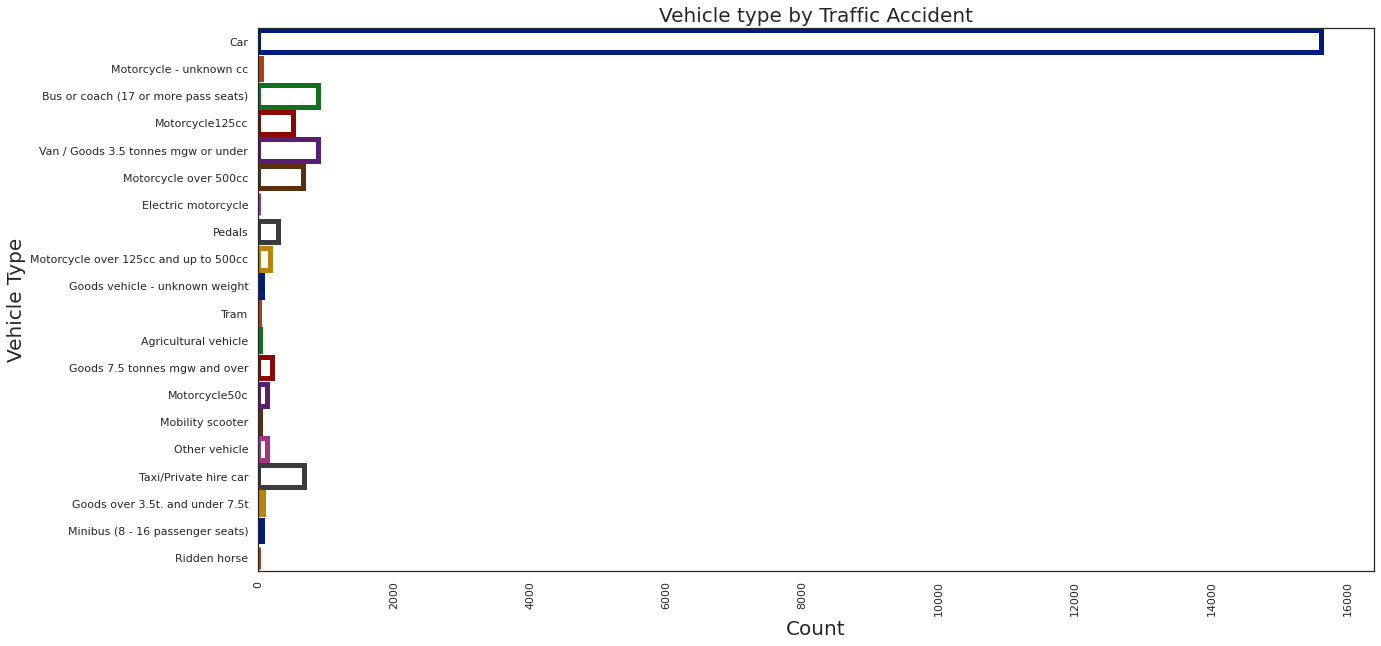

In [114]:
plt.figure(figsize=(20, 10))
plt.rcParams['axes.labelsize'] = 8

sns.countplot(y = "Vehicle_Type", data = data,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   
                   edgecolor=sns.color_palette("dark", 9))

plt.xlabel('Count',fontsize = 20)
plt.ylabel('Vehicle Type',fontsize = 20);

plt.title('Vehicle type by Traffic Accident',fontsize = 20)
plt.xticks(rotation=90);

In [115]:
data['Propulsion_Code'] = data['Propulsion_Code'].map({1: 'Petrol', 2: 'Heavy oil', 3: 'Electric', 4: 'Steam', 5:'Gas', 8:'Petrol/Gas (LPG)', 
                                                    9:'Gas/Bi-fuel', 10:'Hybrid electric', 11:'Gas Diesel', 16:'New fuel technology',17:'Fuel cells',18:'Electric diesel'})

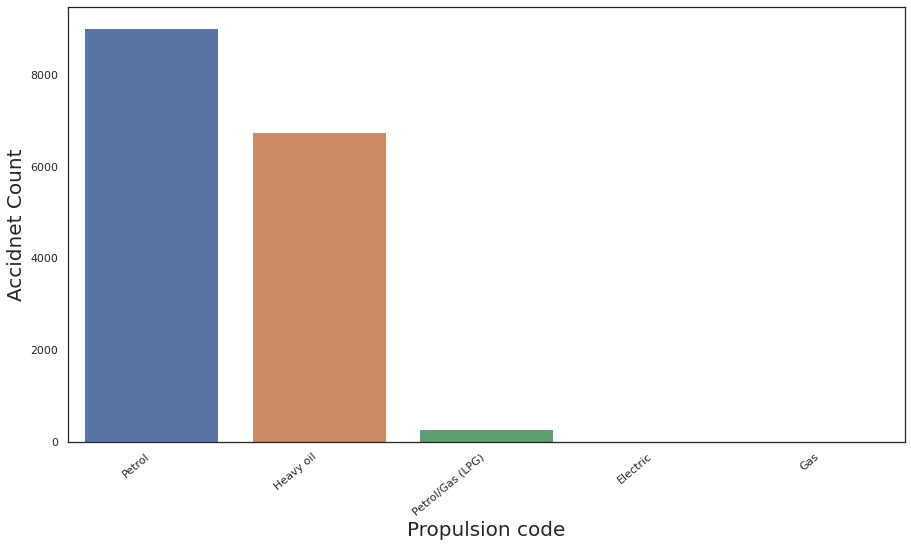

In [116]:
#accidents by vehicle propulsion code
fig, ax = plt.subplots(figsize=(15,8))

rplot = sns.countplot(data=data,x='Propulsion_Code')
plt.xlabel('Propulsion code',fontsize = 20)
plt.ylabel('Accidnet Count',fontsize = 20);
rplot.set_xticklabels(rplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

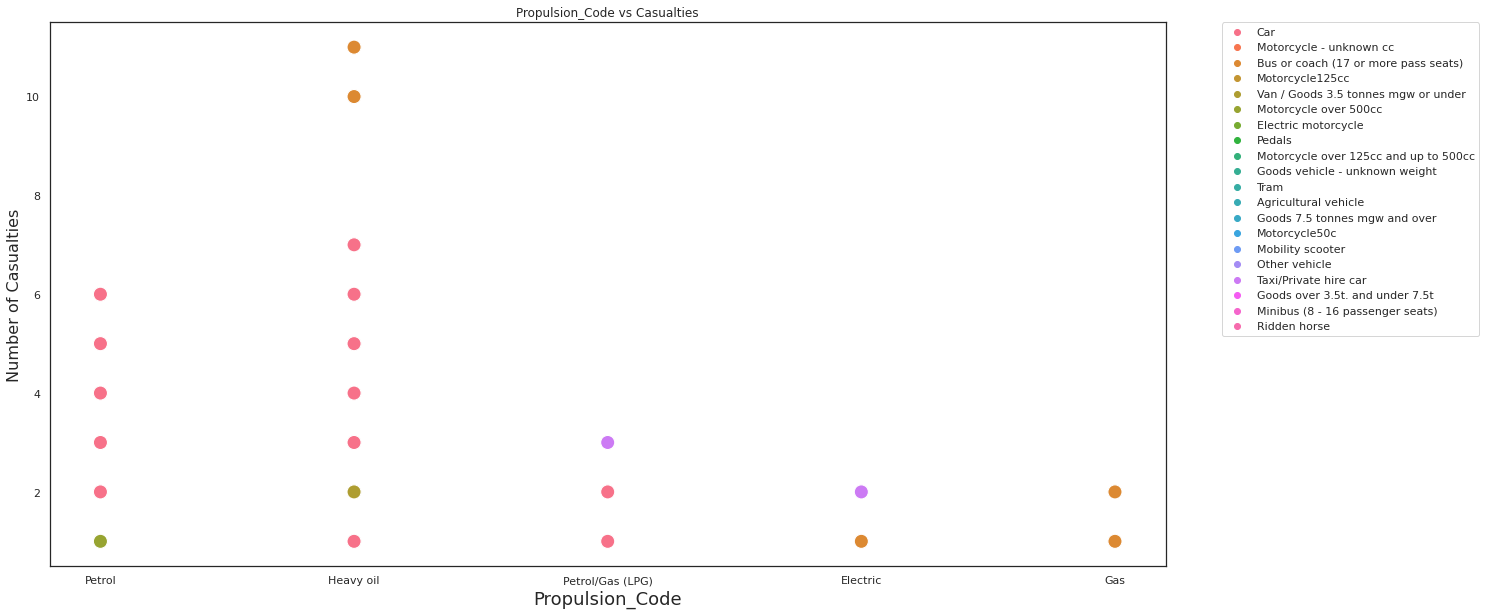

In [117]:




#set chart size
plt.figure(figsize=(20, 10))

#plot graph
sns.scatterplot('Propulsion_Code','Number_of_Casualties', hue='Vehicle_Type', data=data, s=200)

#adjust the size of the labels of the axes 
plt.xlabel('Propulsion_Code', fontsize=18)
plt.ylabel('Number of Casualties', fontsize=16)

#move legend outside of plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#chart title
plt.title("Propulsion_Code vs Casualties");

# **HOW DRIVER VARIABLES HAVE AFFECTED THE OUTCOMES**

In [118]:
vehicles.Sex_of_Driver.value_counts(normalize=True)

1    0.637696
2    0.247096
3    0.115208
Name: Sex_of_Driver, dtype: float64

In [119]:
#created a new dataframe
drivers = vehicles.groupby(['Age_Band_of_Driver', 'Sex_of_Driver']).size().reset_index()

# drop the values that have no value
drivers.drop(drivers[(drivers['Age_Band_of_Driver'] == -1) | \
                     (drivers['Sex_of_Driver'] == -1) | \
                     (drivers['Sex_of_Driver'] == 3)]\
                     .index, axis=0, inplace=True)
# rename the columns
drivers.columns = ['Age_Band_of_Driver', 'Sex_of_Driver', 'Count']

# rename the values to be more convenient for the reader resp. viewer
drivers['Sex_of_Driver'] = drivers['Sex_of_Driver'].map({1: 'male', 2: 'female'})
drivers['Age_Band_of_Driver'] = drivers['Age_Band_of_Driver'].map({1: '0 - 5', 2: '6 - 10', 3: '11 - 15',
                                                                   4: '16 - 20', 5: '21 - 25', 6: '26 - 35',
                                                                   7: '36 - 45', 8: '46 - 55', 9: '56-65',10:'66-75', 11: '75 and Above'})

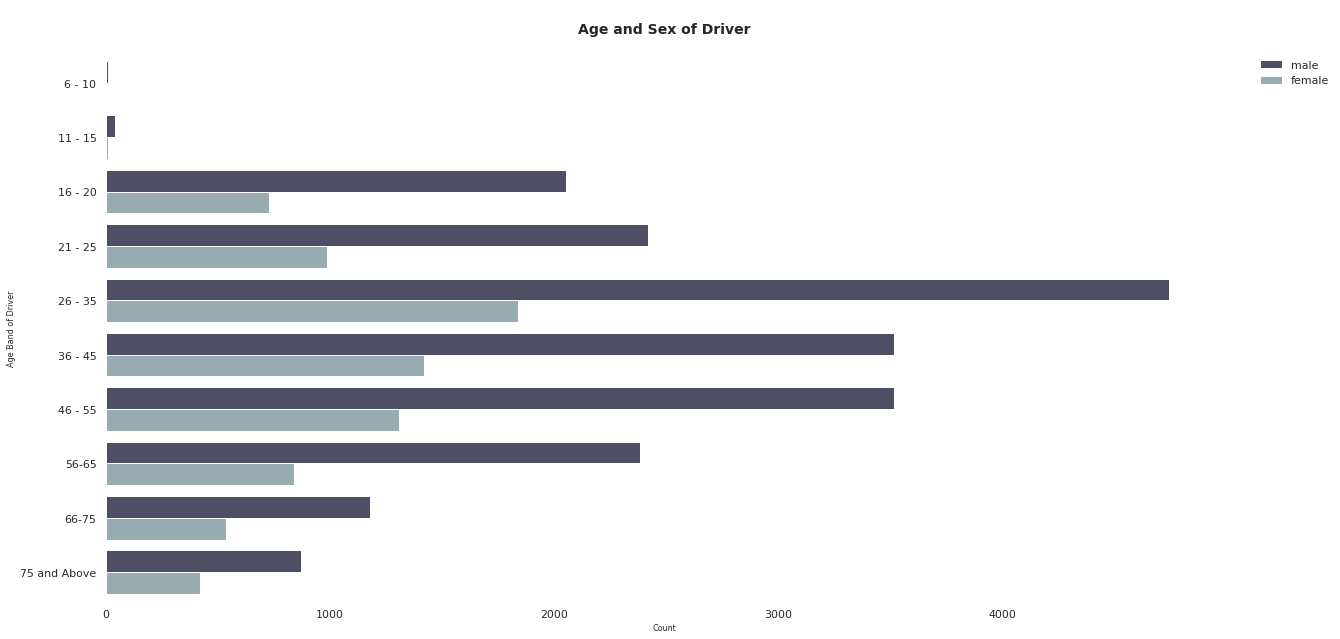

In [120]:
# seaborn barplot
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(y='Age_Band_of_Driver', x='Count', hue='Sex_of_Driver', data=drivers, palette='bone')
ax.set_title('\nAge and Sex of Driver\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Count', ylabel='Age Band of Driver')
ax.legend(bbox_to_anchor=(1.1, 1.), borderaxespad=0., frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

In [121]:
#JOURNEY PURPOSE OF DRIVER MAPPING
data['Journey_Purpose_of_Driver'] = data['Journey_Purpose_of_Driver'].map({1: 'Journey as part of work', 2: 'Commuting to/from work', 3: 'Taking pupil to/from school', 4: 'Pupil riding to/from school', 5:'Other', 8:'Not known', 
                                                    15:'Other/Not known (2005-10)'})

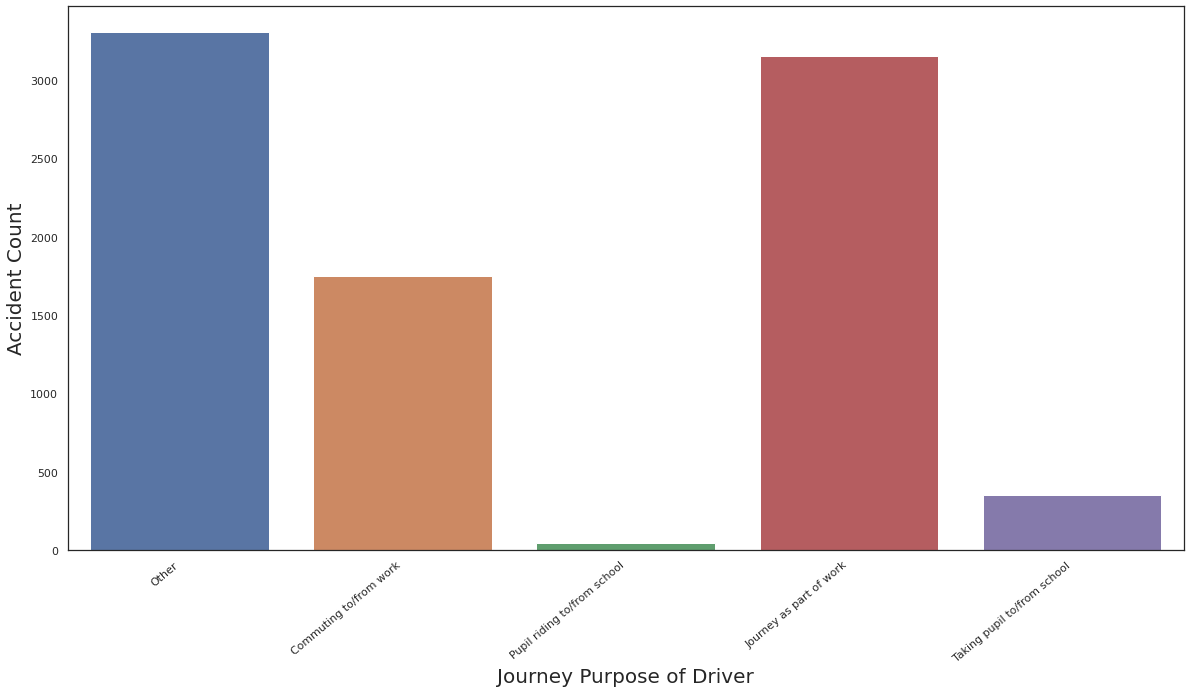

In [122]:
# countplot for speedlimit
fig, ax = plt.subplots(figsize=(20,10))

rplot = sns.countplot(data=data,x="Journey_Purpose_of_Driver")
plt.xlabel('Journey Purpose of Driver',fontsize = 20)
plt.ylabel('Accident Count',fontsize = 20);
rplot.set_xticklabels(rplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [123]:
#JOURNEY PURPOSE OF DRIVER MAPPING
data['Was_Vehicle_Left_Hand_Drive?'] = data['Was_Vehicle_Left_Hand_Drive?'].map({1: 'NO', 2: 'YES'})

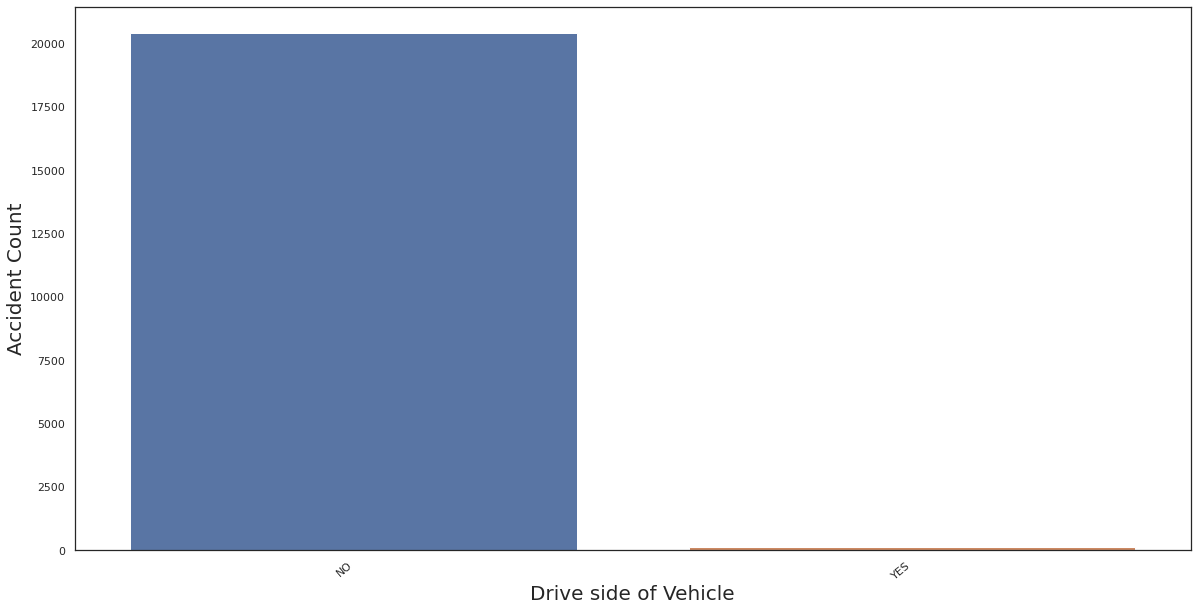

In [124]:
# countplot for driving side
fig, ax = plt.subplots(figsize=(20,10))

rplot = sns.countplot(data=data,x="Was_Vehicle_Left_Hand_Drive?")
plt.xlabel('Drive side of Vehicle',fontsize = 20)
plt.ylabel('Accident Count',fontsize = 20);
rplot.set_xticklabels(rplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

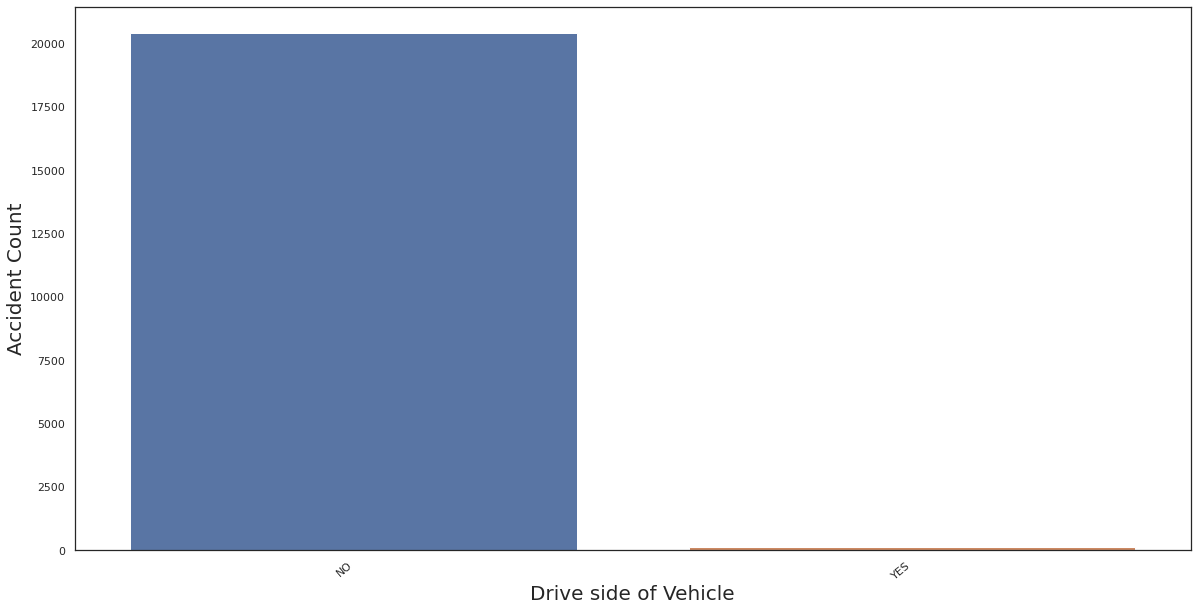

In [125]:
# countplot for driving side
fig, ax = plt.subplots(figsize=(20,10))

rplot = sns.countplot(data=data,x="Was_Vehicle_Left_Hand_Drive?")
plt.xlabel('Drive side of Vehicle',fontsize = 20)
plt.ylabel('Accident Count',fontsize = 20);
rplot.set_xticklabels(rplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

ValueError: ignored

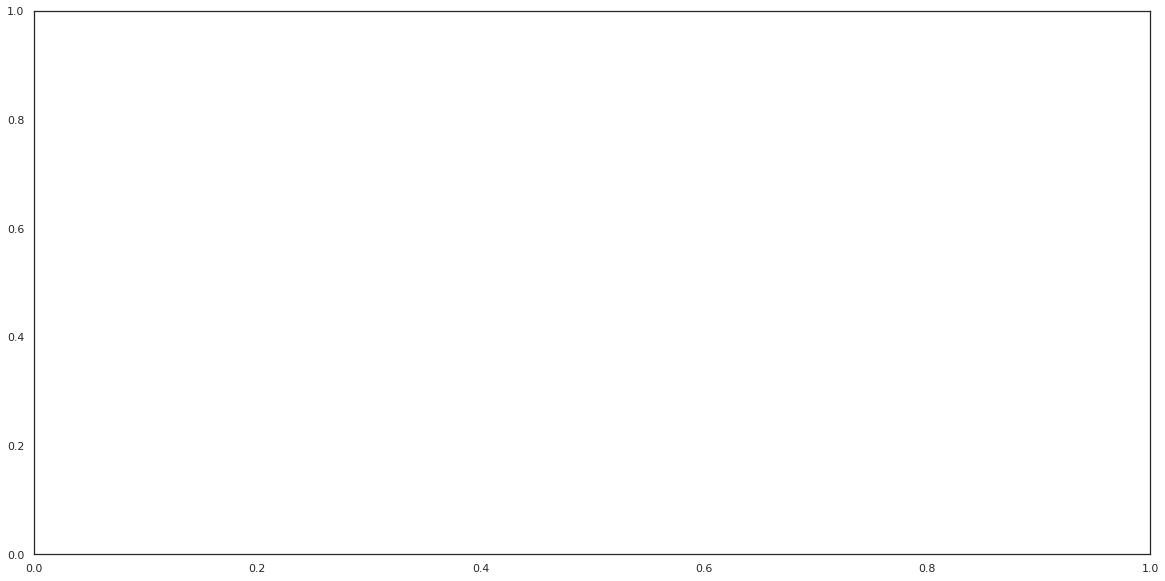

In [126]:
# countplot for driving side
fig, ax = plt.subplots(figsize=(20,10))

rplot = sns.countplot(data=data,x="Age_of_Vehicle")
plt.xlabel('Age of Vehicle',fontsize = 20)
plt.ylabel('Accident Count',fontsize = 20);
rplot.set_xticklabels(rplot.get_xticklabels(), rotation=40, ha="right")
plt.show()